# Projet 3 : Concevoir une application au service de la santé publique

# Notebook d'analyse des données

Dabidin Keshika


Dans ce notebook, nous allons importer le fichier nettoyé obtenu à partir du traitement des données et effectuer une analyse des données afin de concevoir plus concrètement l'idée de l'application de santé. 

**L'idée d'application**:

- Application du nom de MyHealth qui propose un régime alimentaire.

- Proposition d'un ensemble de produits selon le profil : sportif, femme enceinte, régime alimentaire (perte de poids), Entretien du poids, etc. 
L'application exploitera les données de Open Food Facts à travers un algorithme ou un modèle. Des données complémentaires pourront être également exploitées depuis d'autres sites web afin d'extraire toutes les données pertinentes concernant le produit. 

- L'application fera une analyse statistique et à travers des régles de de bonne santé (équilibre et quantités utiles des nutriments) delivrera des recommandations pour atteindre un bon equilibre alimentaire.

- MyHealth va demander à l'utilisateur d'insérer son profil alimentaire (son régime alimentaire quotidien, la fréquence des repas, etc) ainsi que son profil d'activité (sommeil, sport, etc). Elle demandera également de renseigner les conditions de santé (surpois, maladies chroniques, etc), ce qui lui permettera d'établir une moyenne de calories quotidienne que l'utilisateur pourra utiliser pour améliorer son régime. 

- MyHealth pourra par la suite, proposer également des alternatives de repas avec un meilleur nutriscore pour le même nombre de calories selon l'objectif de la personne en consultant l'historique de la personne et en lui proposant de manger par exemple moins gras en consommant tel ou tel aliment à la place de d'autres aliments plus gras. 

# 1. Lecture des données 

In [1]:
#Importation des librairies 

import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lecture des données
data=pd.read_csv("data_projet_3_final.csv",low_memory=False)

In [3]:
df=data.copy()

# 2. Analyse Univariée

## (a) .  Description génrale des données

In [4]:
df.head()

,code,url,states_fr,created_datetime,last_modified_datetime,creator,product_name,brands,countries_fr,ingredients_text,...,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g,nutrition_grade_fr
0,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,usda-ndb-import,Banana Chips Sweetened (Whole),Unknown,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",...,14,4,4,0,0,0,0,0,14.0,d
1,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,usda-ndb-import,Peanuts,Torn & Glasser,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",...,18,7,18,0,0,0,0,0,0.0,b
2,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,usda-ndb-import,Organic Salted Nut Mix,Grizzlies,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",...,4,7,18,0,0,0,0,0,12.0,d
3,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,usda-ndb-import,Organic Polenta,Bob's Red Mill,États-Unis,Organic polenta,...,30,6,9,0,0,0,0,0,0.0,b
4,0000000016100,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:11Z,2017-03-09T10:34:11Z,usda-ndb-import,Breadshop Honey Gone Nuts Granola,Unfi,États-Unis,"Rolled oats, grape concentrate, expeller press...",...,12,8,13,0,0,0,0,0,-2.0,a


In [5]:
df.shape

(276028, 27)

Il y a **276 028** produits avec **27** variables à analyser. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276028 entries, 0 to 276027
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         276028 non-null  object 
 1   url                          276028 non-null  object 
 2   states_fr                    276028 non-null  object 
 3   created_datetime             276028 non-null  object 
 4   last_modified_datetime       276028 non-null  object 
 5   creator                      276028 non-null  object 
 6   product_name                 276028 non-null  object 
 7   brands                       276028 non-null  object 
 8   countries_fr                 276028 non-null  object 
 9   ingredients_text             276028 non-null  object 
 10  serving_size                 276028 non-null  object 
 11  ingredients_from_palm_oil_n  276028 non-null  object 
 12  additives_n                  276028 non-null  float64
 13 

Les données sont de type objet, integer ou de type float. 

In [7]:
df.duplicated().sum()

0

On vérifie bien qu'il n'y a aucune valeur dupliquée. 

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
additives_n,276028.0,1.974437,2.390992,0.0,0.0,1.0,3.0,31.0
energy_100g,276028.0,1097.041999,784.019508,0.0,407.0,1040.0,1644.0,3887.0
fat_100g,276028.0,11.225959,16.932937,0.0,0.0,3.0,18.0,100.0
saturated-fat_100g,276028.0,4.246638,7.461680,0.0,0.0,1.0,6.0,100.0
carbohydrates_100g,276028.0,33.290210,29.690052,0.0,7.0,25.0,58.0,194.0
sugars_100g,276028.0,15.605004,20.198921,0.0,2.0,7.0,22.0,100.0
fiber_100g,276028.0,2.064541,4.119021,0.0,0.0,0.0,3.0,100.0
proteins_100g,276028.0,6.954073,7.935847,0.0,1.0,5.0,10.0,100.0
sodium_100g,276028.0,0.685786,48.588130,0.0,0.0,0.0,1.0,25320.0
calcium_100g,276028.0,0.040692,2.375333,0.0,0.0,0.0,0.0,695.0


**Observations :**
 - Il n'y a pas de valeurs manquantes. 
 - Les produits ont en moyenne : 
   - 2 additifs, 1100 Kcal/100g d'énergie, 11g de graisse alimentaire et 4,2g de graisse saturée, 34 g de glucides et 16g de sucres, 2g de fibre, 7g de protéines, et un nutriscore d'environ 8. 
 -  Toutes les valeurs minimales sont à 0 sauf pour le nutriscore qui peut prendre des valeurs négatives. 
 - L'energie maximale est de 3887 kcal. 
 - Le nombre d'additifs maximal est de 31. 
 On discutera plus tard des écarts à la médianne. 
 

In [8]:
df.describe(include=object).T

,count,unique,top,freq
code,276028,276028,0015700450505,1
url,276028,276028,http://world-fr.openfoodfacts.org/produit/0020...,1
states_fr,276028,705,"A compléter,Informations nutritionnelles compl...",168829
created_datetime,276028,146011,2017-03-09T16:32:00Z,20
last_modified_datetime,276028,138714,2015-08-09T17:35:47Z,28
creator,276028,2664,usda-ndb-import,169792
product_name,276028,197574,Unknown,3621
brands,276028,51274,Unknown,6799
countries_fr,276028,616,États-Unis,171825
ingredients_text,276028,205432,Unknown,27193


**Observations** : 
- Le pays le plus consommateur à première vue est les États Unis. 
- Les states ne sont pas très bien remplis. 
- Il y a 4 et 5 types de valeurs pour les variables : 'ingredients_from_palm_oil_n' et 'nutrition_grade_fr'

In [9]:
#Number of unique observations in each category in the train 
cat_cols = df.select_dtypes(include = ['object']).columns

for column in cat_cols:
    
    print("For column:", column)
    
    print(df[column].unique())
    print('number of Unique values is' ,df[column].nunique())
    
    print('-'*50)

For column: code
['0000000004530' '0000000004559' '0000000016087' ... '99567453'
 '999990026839' 'Unknown']
number of Unique values is 276028
--------------------------------------------------
For column: url
['http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole'
 'http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser'
 'http://world-fr.openfoodfacts.org/produit/0000000016087/organic-salted-nut-mix-grizzlies'
 ...
 'http://world-fr.openfoodfacts.org/produit/99567453/mint-melange-tea-a-blend-of-peppermint-lemon-grass-and-spearmint-trader-joe-s'
 'http://world-fr.openfoodfacts.org/produit/999990026839/sugar-free-drink-mix-peach-tea-market-pantry'
 'Unknown']
number of Unique values is 276028
--------------------------------------------------
For column: states_fr
['A compléter,Informations nutritionnelles complétées,Ingrédients complétés,Date limite à compléter,en:Packaging-code-to-be-completed,Caractéristiques à compléter,Catégorie

number of Unique values is 705
--------------------------------------------------
For column: created_datetime
['2017-03-09T14:32:37Z' '2017-03-09T10:35:31Z' '2017-03-09T10:34:13Z' ...
 '2013-08-06T08:49:57Z' '2013-04-28T15:30:39Z' '2015-10-31T12:07:09Z']
number of Unique values is 146011
--------------------------------------------------
For column: last_modified_datetime
['2017-03-09T14:32:37Z' '2017-03-09T10:35:31Z' '2017-03-09T10:34:13Z' ...
 '2015-11-01T11:20:39Z' '2017-04-03T18:34:59Z' 'en:france']
number of Unique values is 138714
--------------------------------------------------
For column: creator
['usda-ndb-import' 'canieatthis-app' 'tacinte' ... 'mmarquesma' 'namnam'
 'villecomtal-sur-arros-gers-france']
number of Unique values is 2664
--------------------------------------------------
For column: product_name
['Banana Chips Sweetened (Whole)' 'Peanuts' 'Organic Salted Nut Mix' ...
 "Rillette d'oie"
 'Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint'
 'Fran

number of Unique values is 205432
--------------------------------------------------
For column: serving_size
['28 g (1 ONZ)' '28 g (0.25 cup)' '35 g (0.25 cup)' ... '22 g (3 PCS)'
 '25 g (bun)' '0.04']
number of Unique values is 25382
--------------------------------------------------
For column: ingredients_from_palm_oil_n
['0.0' 'Unknown' '1.0' '2.0']
number of Unique values is 4
--------------------------------------------------
For column: nutrition_grade_fr
['d' 'b' 'a' 'c' 'e']
number of Unique values is 5
--------------------------------------------------


Les variables uniques intéressants à étudier sont celui du nutrigrade (a,b,c,d,e) ou celui du nombre d'ingrédients provenant de l'huile de palme (0,1,2, Inconnu). 

On va créer une liste de variables numériques pour étudier plus en détail les données. 

In [10]:
variables_numeriques = [
'energy_100g',
'saturated-fat_100g',
'carbohydrates_100g',
'sugars_100g',
'fiber_100g',
'proteins_100g',
'sodium_100g',
'vitamin-a_100g',
'vitamin-c_100g',
'calcium_100g',
'nutrition-score-fr_100g'
]

variables = ['additives_n',
'ingredients_from_palm_oil_n',
'energy_100g',
'fat_100g',
'saturated-fat_100g',
'carbohydrates_100g',
'sugars_100g',
'fiber_100g',
'proteins_100g',
'sodium_100g',
'vitamin-a_100g',
'vitamin-c_100g',
'calcium_100g',
'iron_100g',
'nutrition-score-fr_100g',
]


## (b) Boxplots  et distributions des nutriments 

additives_n
Skew : 2.21


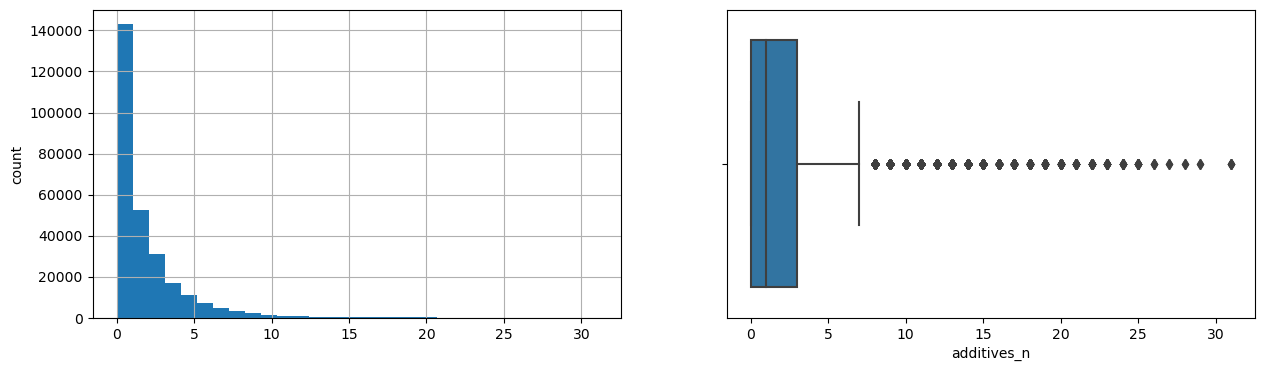

energy_100g
Skew : 0.54


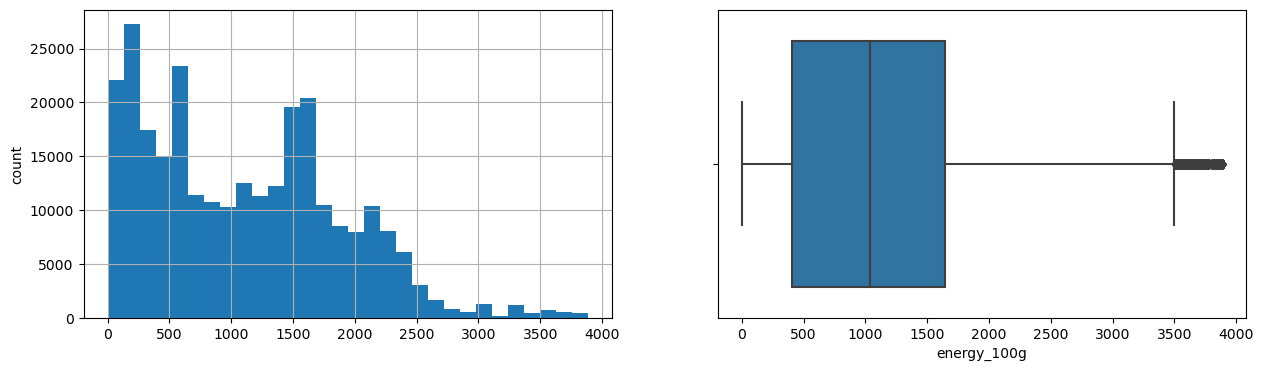

fat_100g
Skew : 2.34


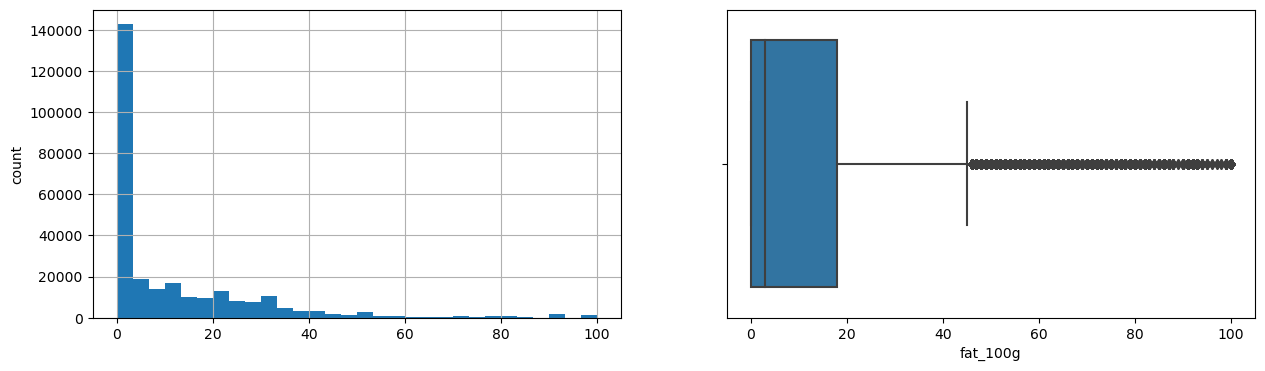

saturated-fat_100g
Skew : 3.71


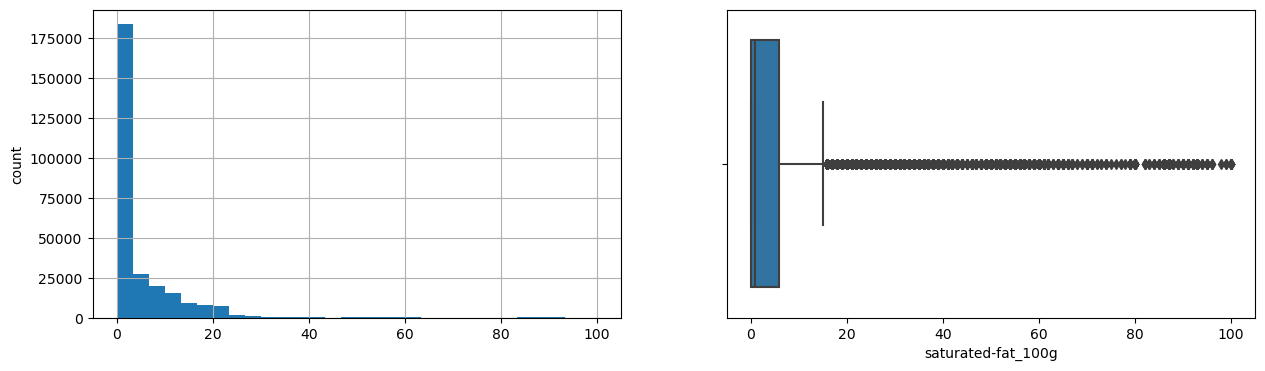

carbohydrates_100g
Skew : 0.71


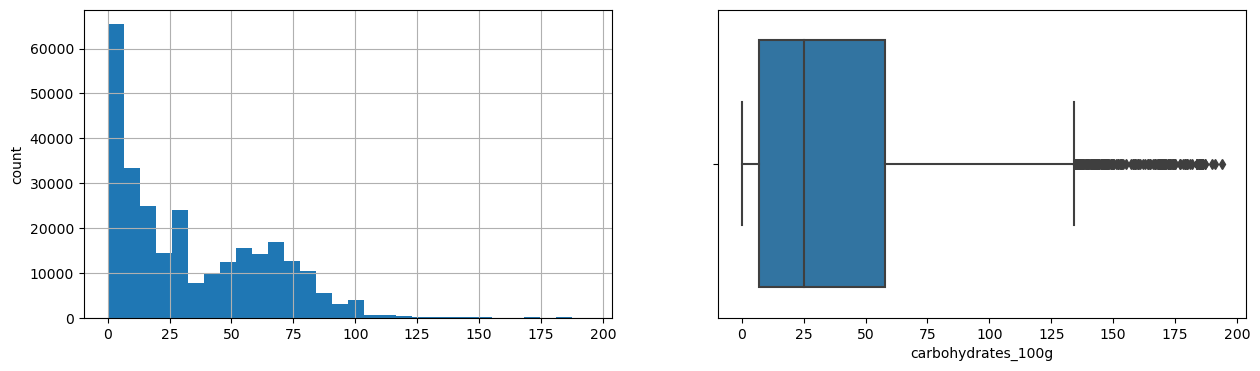

sugars_100g
Skew : 1.76


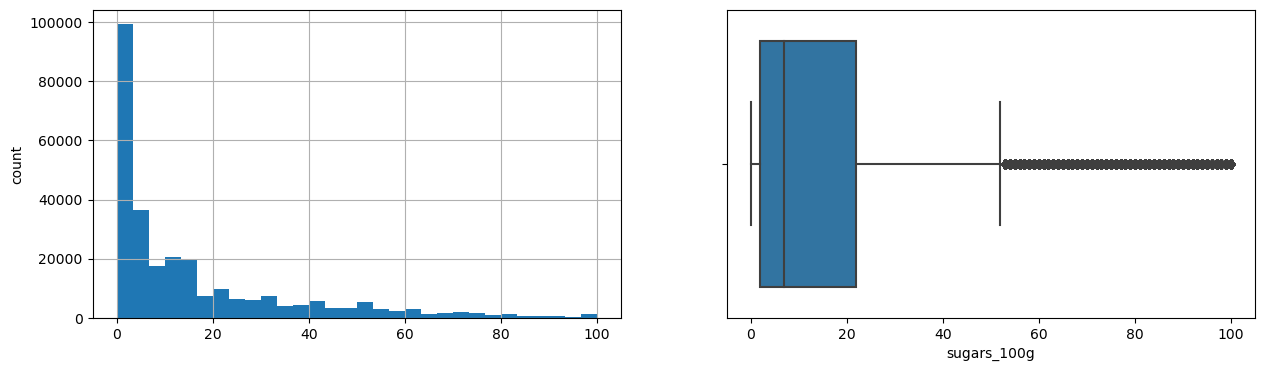

fiber_100g
Skew : 5.51


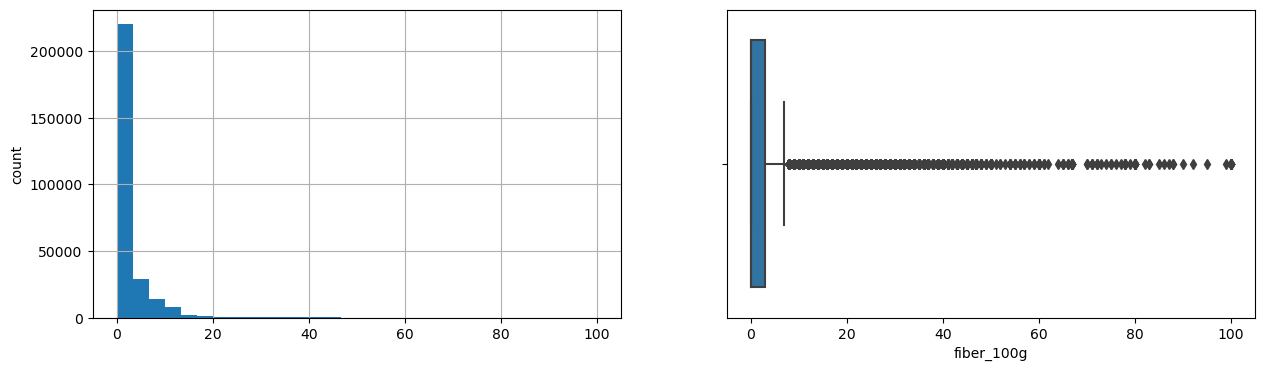

proteins_100g
Skew : 2.21


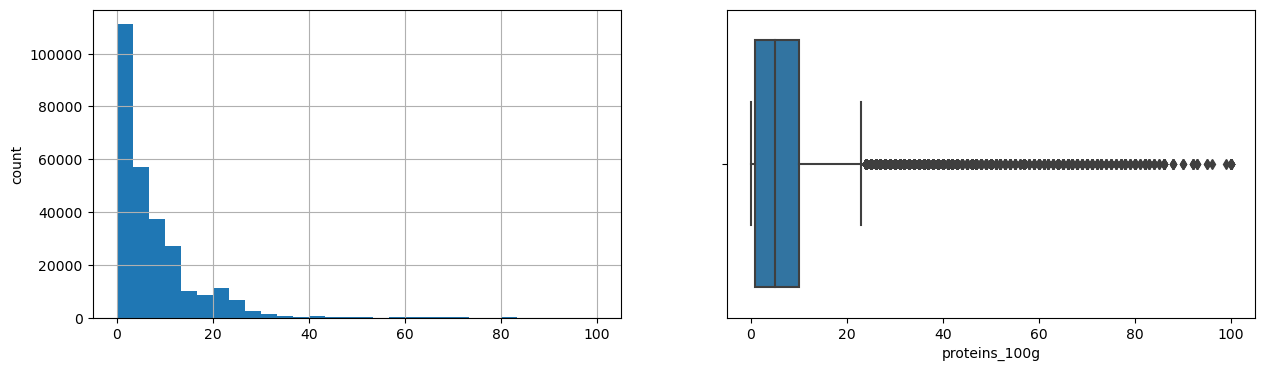

sodium_100g
Skew : 512.9


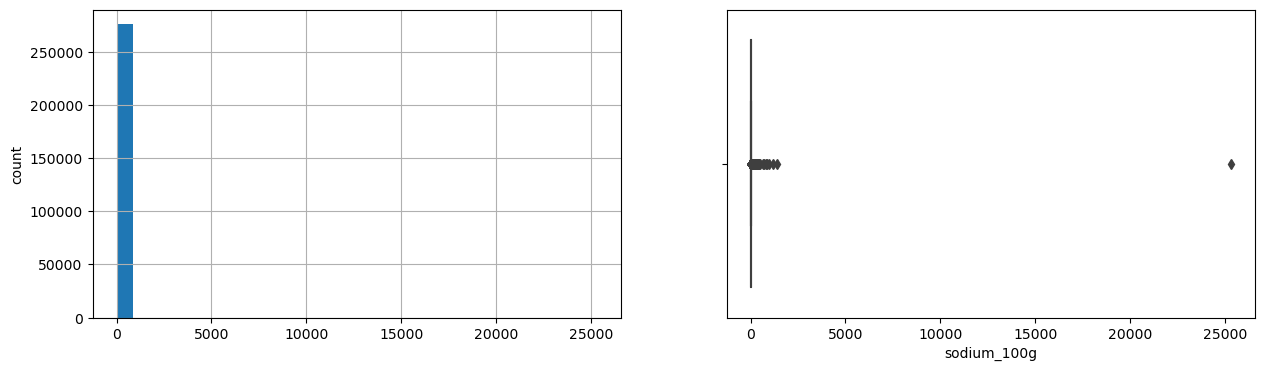

calcium_100g
Skew : 225.12


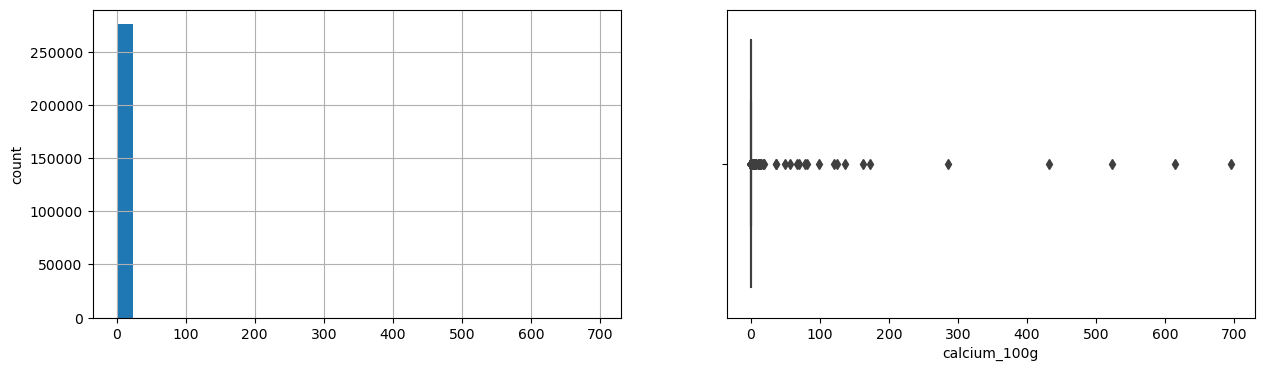

vitamin-c_100g
Skew : 181.9


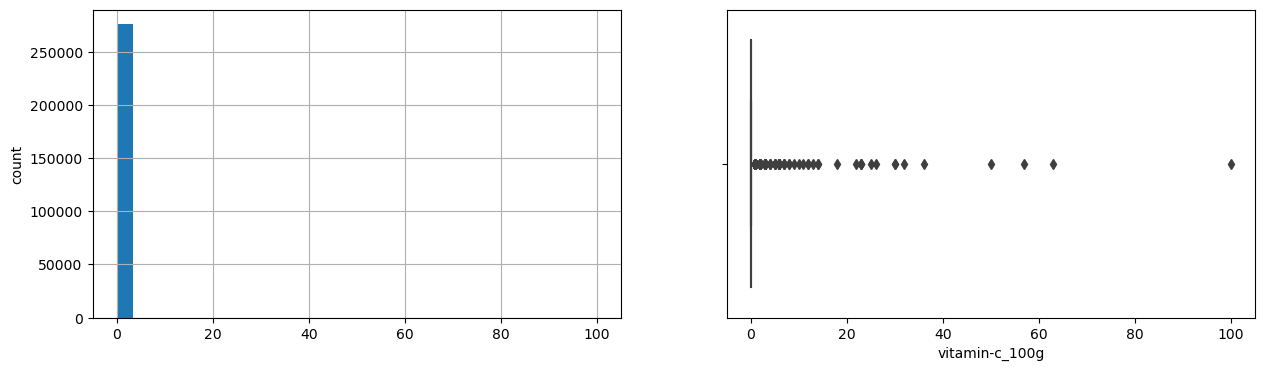

iron_100g
Skew : 262.54


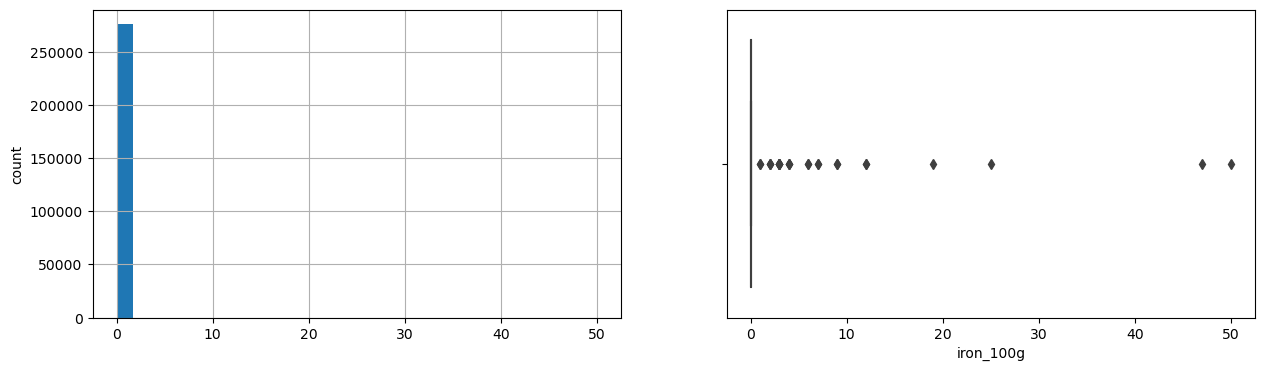

vitamin-a_100g
Skew : 501.67


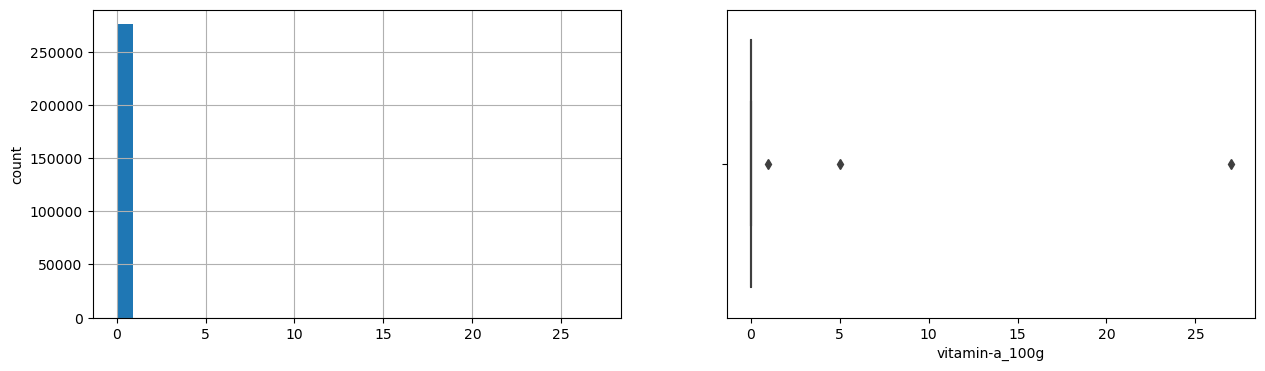

nutrition-score-fr_100g
Skew : 0.34


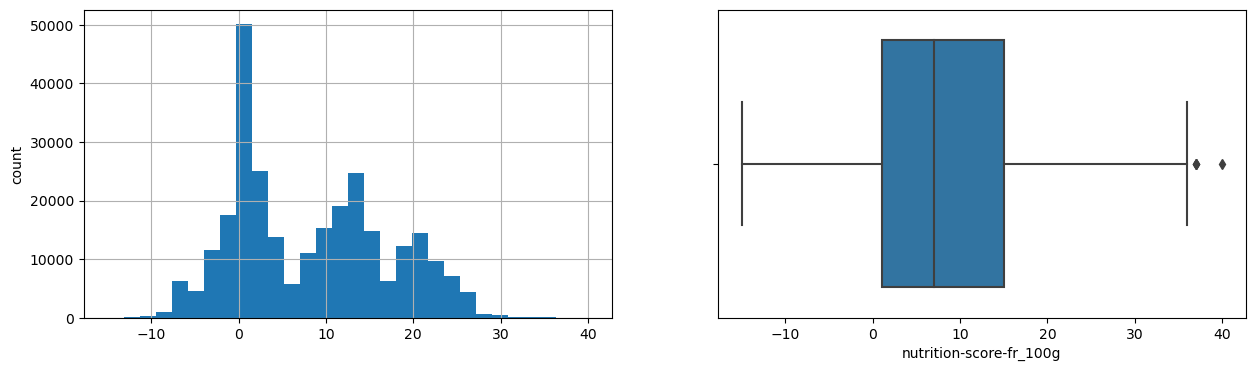

In [11]:
#Liste des colonnes numériques
num_col = df.select_dtypes(exclude=['object'])

for col in num_col:   
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=30)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=col, data = df)
    plt.show()

###  Conclusions sur les variables quantitatives discrètes

#### Variable additives_n

***Observation sur la distribution*** : 
La distribution est assymétrique. Le premier quantile est à 0, la médianne est à 1 et le troisième quantile est à 3 additifs. 
La Skewness est supérieur à 0, alors le dataset est skewed sur la droite. C'est à dire que la majorité des données se trouvent sur la gauche et les outliers se trouvent sur la droite.

***Observation sur le boxplot*** : 
L'interval supérieur est à 7 additifs. Visualisons les outliers : 


In [13]:
print(f"Nombre d'observations avec plus de 7 additifs {df[df['additives_n']>7].shape[0]}")
print(f"Pourcentage d'observations avec plus de 7 additifs {df[df['additives_n']>7].shape[0] / df.shape[0] * 100:.2f}%")
print("-"*223)
print("10 observations ayant les plus grandes valeurs additifs_n")
display(df[df["additives_n"]>7].sort_values(by="additives_n", ascending=False).head(10))

Nombre d'observations avec plus de 7 additifs 9800
Pourcentage d'observations avec plus de 7 additifs 3.55%
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
10 observations ayant les plus grandes valeurs additifs_n


,code,url,states_fr,created_datetime,last_modified_datetime,creator,product_name,brands,countries_fr,ingredients_text,...,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g,nutrition_grade_fr
176419,2600280011543,http://world-fr.openfoodfacts.org/produit/2600...,"A vérifier,Complet,Informations nutritionnelle...",2016-04-17T13:58:08Z,2016-05-01T16:03:47Z,agamitsudo,Confiserie,sans marque,France,Ingrédients: sirops de glucose et de glucose-f...,...,83,0,2,0,0,0,0,0,18.0,d
176418,2600280009649,http://world-fr.openfoodfacts.org/produit/2600...,"A vérifier,Complet,Informations nutritionnelle...",2016-04-17T15:03:02Z,2016-05-01T14:05:02Z,agamitsudo,Confiserie,sans marque,France,Ingrédients: sirops de glucose et de glucose-f...,...,83,0,2,0,0,0,0,0,18.0,d
176420,2600280012205,http://world-fr.openfoodfacts.org/produit/2600...,"A vérifier,Complet,Informations nutritionnelle...",2016-04-17T14:50:32Z,2016-12-07T22:48:59Z,agamitsudo,Confiserie,sans marque,France,Ingrédients: sirops de glucose et de glucose-f...,...,83,0,2,0,0,0,0,0,18.0,d
152448,0846379098046,http://world-fr.openfoodfacts.org/produit/0846...,"A compléter,Informations nutritionnelles compl...",2017-03-09T11:03:08Z,2017-03-09T11:03:10Z,usda-ndb-import,Italian Style Pinwheels,"Taylor Farms, Taylor Farms Illinois Inc",États-Unis,Flour tortilla (enriched bleached wheat flour ...,...,2,4,11,1,0,0,0,0,10.0,c
89053,0076185002511,http://world-fr.openfoodfacts.org/produit/0076...,"A compléter,Informations nutritionnelles compl...",2017-03-09T14:04:14Z,2017-03-09T14:04:15Z,usda-ndb-import,Caramel Pecan Danish Coffeecake,Arnie's,États-Unis,"Enriched wheat flour (niacin iron, thiamine mo...",...,24,2,4,0,0,0,0,0,13.0,d
89061,0076185004669,http://world-fr.openfoodfacts.org/produit/0076...,"A compléter,Informations nutritionnelles compl...",2017-03-09T14:04:21Z,2017-03-09T14:04:22Z,usda-ndb-import,Mackinaw Fudge Cake,Arnie's,États-Unis,"Sugar, enriched wheat flour bleached (flour, n...",...,40,1,2,0,0,0,0,0,16.0,d
16138,0020735990148,http://world-fr.openfoodfacts.org/produit/0020...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:47:57Z,2017-03-09T10:47:58Z,usda-ndb-import,"Ice Cream Cake, Vanilla & Chocolate Swirl",Turkey Hill,États-Unis,"Vanilla and chocolate ice cream: milk, cream, ...",...,27,0,3,0,0,0,0,0,19.0,e
20924,0024300043147,http://world-fr.openfoodfacts.org/produit/0024...,"A compléter,Informations nutritionnelles compl...",2017-03-09T11:08:33Z,2017-03-09T11:08:34Z,usda-ndb-import,Star Crunch Cookies,Little Debbie,États-Unis,"Sugar, corn syrup, enriched bleached flour (wh...",...,40,2,3,0,0,0,0,0,23.0,e
156576,0853284006035,http://world-fr.openfoodfacts.org/produit/0853...,"A compléter,Informations nutritionnelles compl...",2017-03-09T12:54:42Z,2017-03-09T12:54:43Z,usda-ndb-import,"Sweet Espresso Caramel Cake, Sea Salt Caramel","Tgi Fridays, Captivated Foods Llc",États-Unis,"Sugar, enriched wheat flour (bleached wheat fl...",...,39,0,3,1,0,0,0,0,32.0,e
76908,0072036958204,http://world-fr.openfoodfacts.org/produit/0072...,"A compléter,Informations nutritionnelles compl...",2017-03-09T09:26:24Z,2017-03-09T09:26:25Z,usda-ndb-import,"Ice Cream Cake, Chocolate & Vanilla Swirl",Harris Teeter,États-Unis,"Vanilla and chocolate ice cream (milk, cream, ...",...,20,0,3,0,0,0,0,0,18.0,d


In [14]:
print(f"Mesure d'asymétrie empirique de la variable additives_n: {df['additives_n'].skew(axis=0)}")
print(f"Messure d'aplatissement empirique de la variable additives_n: {df['additives_n'].kurtosis(axis=0)}")

Mesure d'asymétrie empirique de la variable additives_n: 2.207613007162528
Messure d'aplatissement empirique de la variable additives_n: 8.130335062841432


Les indicateurs confirment ce que nous avons observé de manière empirique:

- Une mesure de symétrie supérieur à zéro indique que la distribution de la variable est étalée sur la droite.
- Une mesure d'aplatissement supérieur à zéro indique que la disytribution de la variable est plus concentrée qu'une loi normale.


Comparons la distribution de la variable à celle d'une loi normale à l'aide du diagramme quantile-quantile.

In [16]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
import scipy.stats as st

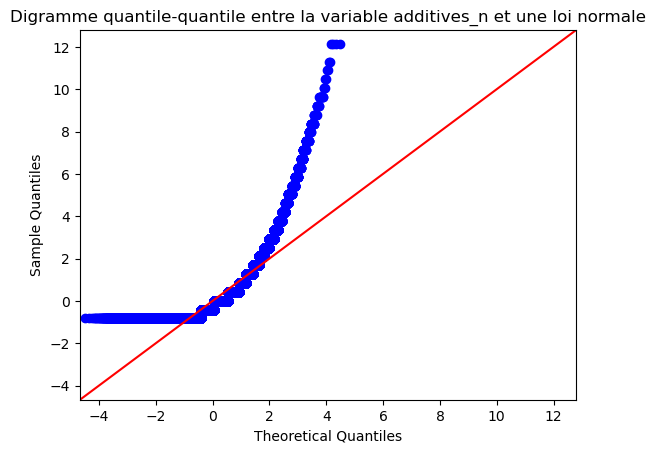

In [17]:
#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(df['additives_n'], line='45',fit=True)
plt.title("Digramme quantile-quantile entre la variable additives_n et une loi normale")
plt.show()

**Interprétations** : Les valeurs s'écartent de la loi normale. Si la variable additives_n suivait une loi normale, les observations suivraient la diagonale du digramme quantile-quantile.

In [18]:
def shapiro_wilk_test(var):
    """
    Statistical test to evaluate if a variable follows a normal distribution.
    
    H0 hypothesis : The variable follows a normal distribution
    
    Args:
        var(Dataframe series): Varibale to test
        
    Returns:
        stat(float): The test statistic
        
        p-value(float): The p-value of the test
    
    """
    print("-"*50)
    print(f"Test statistique de normalité de la variable {var.name}\n")
    stat, p = st.shapiro(var)
    print(f"""Indicateur statistique: {stat}\n p valeur: {p}\n""")
    if p < 0.05:
        print("L'hypothèse H0 de normalité peut être rejetée avec un risque de 5%\n" )
    if p > 0.05:
        print("L'hypothèse H0 ne peut être rejetée avec un risque de 5\n")
    print("-"*50)
    return stat, p

shapiro_wilk_test(df["additives_n"])

--------------------------------------------------
Test statistique de normalité de la variable additives_n

Indicateur statistique: 0.7744181752204895
 p valeur: 0.0

L'hypothèse H0 de normalité peut être rejetée avec un risque de 5%

--------------------------------------------------


(0.7744181752204895, 0.0)

Le test confirme que la distribution de la varibale additives_n ne suit pas une loi normale. 

### Variables quatitatives continues 

#### Variable energy_100g

***Observation sur la distribution*** : 
La distribution est assymétrique. 
La Skewness est aussi supérieur à 0, alors le dataset est skewed sur la droite. C'est à dire que la majorité des données se trouvent sur la gauche et les outliers se trouvent sur la droite. 

***Observation sur le boxplot*** : 
On constate qu'il y a pas tant de outliers et ils sont dans la limite des données acceptables. 
Les valeurs sont concentrées dans l'interval inter-quartile entre 406 et 1644. La boîte à moustache montre de nombreuses observations qui ont des valeurs atypiques située au delà de la borne supérieur de 1,5 interquartile.

Étudions la distribution de la variable via un histogramme.

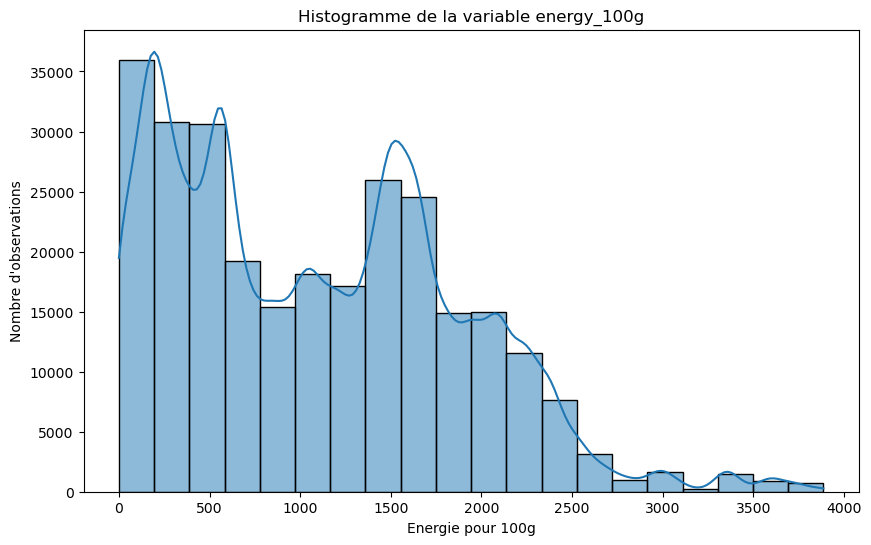

In [19]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax = sns.histplot(data=df, x='energy_100g', bins="sturges", kde=True)
ax.set_xlabel("Energie pour 100g")
ax.set_ylabel("Nombre d'observations")
ax.set_title("Histogramme de la variable energy_100g")

plt.show()

Les observations sont regroupées à gauche. 

In [20]:
print(f"Mesure d'asymétrie empirique de la variable energy_100g: {data['energy_100g'].skew(axis=0)}")
print(f"Messure d'aplatissement empirique de la variable energy_100g: {data['energy_100g'].kurtosis(axis=0)}")

Mesure d'asymétrie empirique de la variable energy_100g: 0.5360734123508238
Messure d'aplatissement empirique de la variable energy_100g: -0.29372289009002506


La mesure d'asymétrie confirme une distribution étalées à droite. La mesure d'aplatissement confirme que les observations sont beaucoup plus concentrées qu'une distribution normale. Réalisions tout de même de diagramme quantile-quantile avec une loi normale et un test Shapiro-Wilk. 

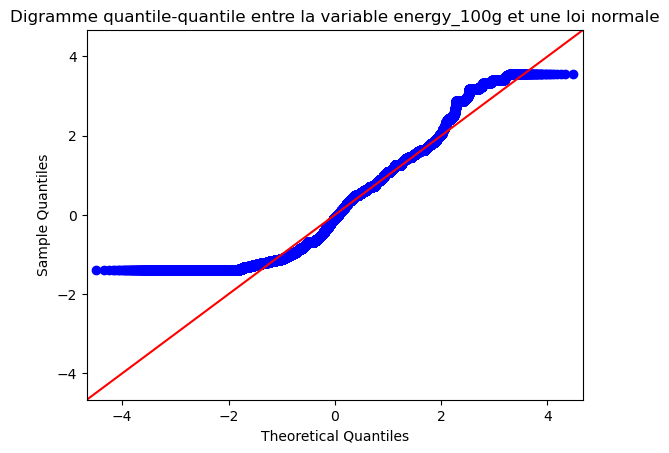

In [21]:
fig = sm.qqplot(df['energy_100g'], line='45',fit=True)
plt.title("Digramme quantile-quantile entre la variable energy_100g et une loi normale")
plt.show()

In [24]:
shapiro_wilk_test(df["energy_100g"])

--------------------------------------------------
Test statistique de normalité de la variable energy_100g

Indicateur statistique: 0.9495962858200073
 p valeur: 0.0

L'hypothèse H0 de normalité peut être rejetée avec un risque de 5%

--------------------------------------------------


(0.9495962858200073, 0.0)

La variable ne suit pas une loi normale. 

#### Variable fat_100g

***Observation sur la distribution*** : 
La distribution est assymétrique mais reste concentrée autour de zéro. 
La Skewness est supérieur à 0, alors le dataset est skewed sur la droite. C'est à dire que la majorité des données se trouvent sur la gauche et les outliers se trouvent sur la droite.

***Observation sur le boxplot*** : 
 La majorité des observations ont des valeurs comprises entre de premier quartile (0) et le troisième quartile (18). L'interval supérieur est à environ 40g. Visualisons les outliers : 


In [22]:
print(f"Nombre d'observations avec plus de 40g {df[df['fat_100g']>40].shape[0]}")
print(f"Pourcentage d'observations avec plus de 40g {df[df['fat_100g']>40].shape[0] / df.shape[0] * 100:.2f}%")
print("-"*223)
print("10 observations avec plus de 40g")
display(df[df["fat_100g"]>40].sort_values(by="fat_100g", ascending=False).head(10))

Nombre d'observations avec plus de 40g 15369
Pourcentage d'observations avec plus de 40g 5.57%
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
10 observations avec plus de 40g


,code,url,states_fr,created_datetime,last_modified_datetime,creator,product_name,brands,countries_fr,ingredients_text,...,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g,nutrition_grade_fr
202675,3265471024109,http://world-fr.openfoodfacts.org/produit/3265...,"A vérifier,Complet,Informations nutritionnelle...",2013-07-26T14:39:29Z,2016-08-20T14:39:03Z,andre,Coeur de Tournesol (+20% gratuit),Lesieur,France,100% huile de tournesol,...,0,0,0,0,0,0,0,0,11.0,d
124644,0706950123522,http://world-fr.openfoodfacts.org/produit/0706...,"A compléter,Informations nutritionnelles compl...",2017-03-09T11:36:02Z,2017-03-09T11:36:02Z,usda-ndb-import,Extra Virgin Olive Oil,Sevilla Mia,États-Unis,"20% extra virgin olive oil, 80% vegetable oil",...,13,0,0,0,0,0,0,0,22.0,e
14020,0018894103356,http://world-fr.openfoodfacts.org/produit/0018...,"A compléter,Informations nutritionnelles compl...",2017-03-10T08:21:14Z,2017-03-10T08:21:14Z,usda-ndb-import,All Vegetable Shortening,Big Y,États-Unis,"Soybean oil, hydrogenated palm oil, palm oil, ...",...,12,0,0,0,0,0,0,0,22.0,e
245777,5400247010148,http://world-fr.openfoodfacts.org/produit/5400...,"A vérifier,Complet,Informations nutritionnelle...",2014-10-03T15:46:57Z,2015-04-17T15:15:13Z,tacite,Huile de tournesol,Winny,France,Huile de tournesol.,...,0,0,0,0,0,0,0,0,12.0,d
29648,0035826057839,http://world-fr.openfoodfacts.org/produit/0035...,"A compléter,Informations nutritionnelles compl...",2017-03-09T16:52:41Z,2017-03-09T16:52:41Z,usda-ndb-import,Peanut & Soybean Oil Blend,"Food Lion, Food Town Stores Inc.",États-Unis,"Peanut oil, soybean oil",...,14,0,0,0,0,0,0,0,23.0,e
44333,0041331012379,http://world-fr.openfoodfacts.org/produit/0041...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:42:20Z,2017-03-09T10:42:20Z,usda-ndb-import,100% Pure Vegetable Oil,Goya,États-Unis,Soybean oil.,...,13,0,0,0,0,0,0,0,22.0,e
245809,5400247021533,http://world-fr.openfoodfacts.org/produit/5400...,"A vérifier,Complet,Informations nutritionnelle...",2015-06-10T16:09:54Z,2015-06-10T16:14:53Z,tacite,Huile pour friture,Winny,France,"Huile de tournesol, huile de palme, huile de c...",...,0,0,0,0,0,0,0,0,12.0,d
44334,0041331012393,http://world-fr.openfoodfacts.org/produit/0041...,"A compléter,Informations nutritionnelles compl...",2017-03-09T09:58:58Z,2017-03-09T09:58:58Z,usda-ndb-import,"Vegetable Oil, Soybean Oil, 100% Pure",Goya,États-Unis,Soybean oil.,...,13,0,0,0,0,0,0,0,22.0,e
245839,5400247028709,http://world-fr.openfoodfacts.org/produit/5400...,"A vérifier,Complet,Informations nutritionnelle...",2015-03-26T19:18:59Z,2015-03-26T19:21:34Z,tacite,Huile de Colza,Winny,France,Huile de colza.,...,0,0,0,0,0,0,0,0,10.0,c
246089,5400910105201,http://world-fr.openfoodfacts.org/produit/5400...,"A vérifier,Complet,Informations nutritionnelle...",2016-03-10T18:26:28Z,2016-09-24T09:40:24Z,openfoodfacts-contributors,Huile de coco,Nutridia,Belgique,Huile de noix de coco pure,...,0,0,0,0,0,0,0,0,15.0,d


La majorité des outliers sont des huiles végétales majoritarement constitué de graisses. 

#### Variable saturated-fat_100g

***Observation sur la distribution*** : 
La distribution est assymétrique. 
La Skewness est supérieur à 0, alors le dataset est skewed sur la droite. C'est à dire que la majorité des données se trouvent sur la gauche et les outliers se trouvent sur la droite.

***Observation sur le boxplot*** : 
L'interval supérieur est à environ 18g. Visualisons les outliers : 


In [23]:
print(f"Nombre d'observations avec plus de 18g {df[df['saturated-fat_100g']>18].shape[0]}")
print(f"Pourcentage d'observations avec plus de 18g {df[df['saturated-fat_100g']>18].shape[0] / df.shape[0] * 100:.2f}%")
print("-"*223)
print("10 observations avec plus de 18g")
display(df[df["saturated-fat_100g"]>18].sort_values(by="saturated-fat_100g", ascending=False).head(10))

Nombre d'observations avec plus de 18g 14046
Pourcentage d'observations avec plus de 18g 5.09%
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
10 observations avec plus de 18g


,code,url,states_fr,created_datetime,last_modified_datetime,creator,product_name,brands,countries_fr,ingredients_text,...,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g,nutrition_grade_fr
275588,9312628260010,http://world-fr.openfoodfacts.org/produit/9312...,"A vérifier,Complet,Informations nutritionnelle...",2016-12-12T03:18:44Z,2016-12-12T03:57:57Z,triddin,Melrose MCT,Melrose,Australie,"Medium Triglycerides (Caprylic acid [C8] 55%, ...",...,0,0,0,0,0,0,0,0,20.0,e
136205,0746646306556,http://world-fr.openfoodfacts.org/produit/0746...,"A compléter,Informations nutritionnelles compl...",2017-03-09T17:12:24Z,2017-03-09T17:12:24Z,usda-ndb-import,Pure Grapeseed Oil,Overseas Food Dist Inc.,États-Unis,100% pure grapeseed oil,...,30,0,0,0,0,0,0,0,25.0,e
255390,7611525039111,http://world-fr.openfoodfacts.org/produit/7611...,"A compléter,Informations nutritionnelles compl...",2015-04-05T15:18:57Z,2016-05-26T12:46:27Z,op3nus3r,test,Unknown,Unknown,Unknown,...,0,0,12,0,0,0,0,0,5.0,c
204728,3270190118800,http://world-fr.openfoodfacts.org/produit/3270...,"A compléter,Informations nutritionnelles compl...",2017-02-20T18:11:48Z,2017-02-20T18:11:48Z,kiliweb,Huile De Tournesol Végétale 2 Litre,Carrefour,France,Unknown,...,0,0,0,0,0,0,0,0,20.0,e
249897,6091035082004,http://world-fr.openfoodfacts.org/produit/6091...,"A compléter,Informations nutritionnelles compl...",2017-02-21T17:31:42Z,2017-02-21T17:31:44Z,kiliweb,Eau,Vital,France,Unknown,...,100,100,100,1,0,0,0,0,24.0,e
71844,0070896522221,http://world-fr.openfoodfacts.org/produit/0070...,"A compléter,Informations nutritionnelles compl...",2017-03-10T08:15:57Z,2017-03-10T08:15:57Z,usda-ndb-import,Ez Thun Dipping Aid,Wilton,États-Unis,"Partially hydrogenated palm kernel oil, soy le...",...,28,0,0,0,0,0,0,0,26.0,e
176487,26008028,http://world-fr.openfoodfacts.org/produit/2600...,"A vérifier,Complet,Informations nutritionnelle...",2015-05-30T13:55:56Z,2015-05-30T20:12:26Z,tacite,Jog'Frit,Jog'Frit,France,Huile de noix de coco totalement hydrogénée.,...,0,0,0,0,0,0,0,0,20.0,e
140782,0776476741029,http://world-fr.openfoodfacts.org/produit/0776...,"A compléter,Informations nutritionnelles compl...",2017-03-10T10:14:37Z,2017-03-10T10:14:37Z,usda-ndb-import,Coconut Oil,Desi,États-Unis,Coconut oil,...,0,0,0,0,0,0,0,0,20.0,e
244654,5158418187631,http://world-fr.openfoodfacts.org/produit/5158...,"A compléter,Informations nutritionnelles compl...",2015-03-21T08:28:10Z,2015-11-16T06:29:34Z,crochet-david,Végétaline (offre familiale),Végétaline,France,Unknown,...,0,0,0,0,0,0,0,0,15.0,d
140781,0776476741005,http://world-fr.openfoodfacts.org/produit/0776...,"A compléter,Informations nutritionnelles compl...",2017-03-10T10:14:37Z,2017-03-10T10:14:37Z,usda-ndb-import,Coconut Oil,Desi,États-Unis,Coconut oil,...,0,0,0,0,0,0,0,0,20.0,e


Les outliers sont également des fritures et des huiles grasses. 

#### Variable carbohydrates_100g

***Observation sur la distribution*** : 
La distribution est un peu assymétrique. 
La Skewness est aussi supérieur à 0, alors le dataset est skewed sur la droite. C'est à dire que la majorité des données se trouvent sur la gauche et les outliers se trouvent sur la droite. 

***Observation sur le boxplot*** : 
On constate qu'il y a pas tant de outliers et ils sont dans la limite des données acceptables. 

Étudions la distribution de la variable via un histogramme.

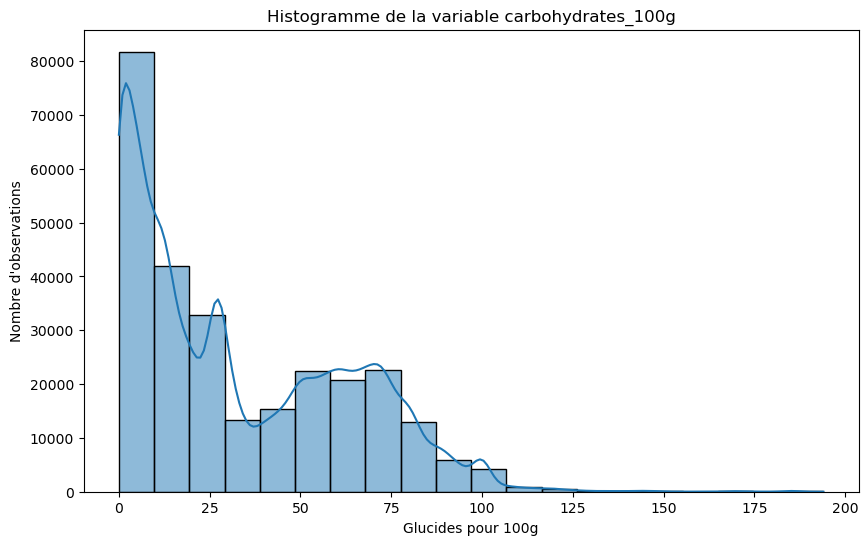

In [24]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax = sns.histplot(data=df, x='carbohydrates_100g', bins="sturges", kde=True)
ax.set_xlabel("Glucides pour 100g")
ax.set_ylabel("Nombre d'observations")
ax.set_title("Histogramme de la variable carbohydrates_100g")

plt.show()

In [25]:
print(f"Mesure d'asymétrie empirique de la variable carbohydrates_100g: {data['carbohydrates_100g'].skew(axis=0)}")
print(f"Messure d'aplatissement empirique de la variable carbohydrates_100g: {data['carbohydrates_100g'].kurtosis(axis=0)}")

Mesure d'asymétrie empirique de la variable carbohydrates_100g: 0.7101216181281442
Messure d'aplatissement empirique de la variable carbohydrates_100g: -0.35657637942074105


La mesure d'asymétrie confirme une distribution étalées à droite. La mesure d'aplatissement confirme que les observations sont beaucoup plus concentrées qu'une distribution normale. Réalisions tout de même de diagramme quantile-quantile avec une loi normale et un test Shapiro-Wilk. 

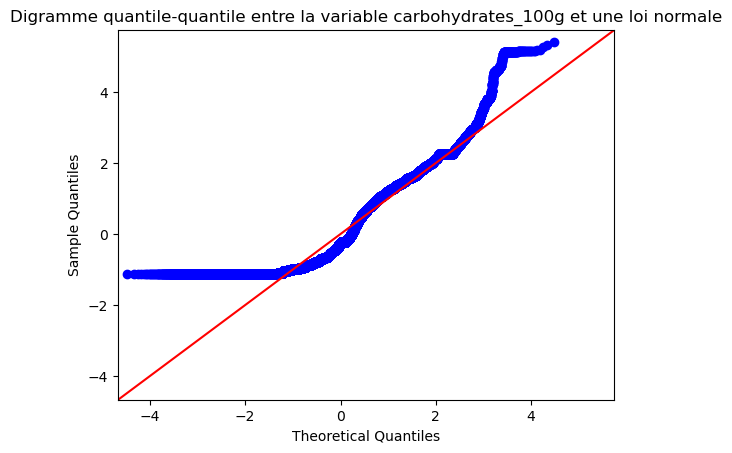

In [26]:
fig = sm.qqplot(df['carbohydrates_100g'], line='45',fit=True)
plt.title("Digramme quantile-quantile entre la variable carbohydrates_100g et une loi normale")
plt.show()

In [27]:
shapiro_wilk_test(df['carbohydrates_100g'])

--------------------------------------------------
Test statistique de normalité de la variable carbohydrates_100g

Indicateur statistique: 0.9010429978370667
 p valeur: 0.0

L'hypothèse H0 de normalité peut être rejetée avec un risque de 5%

--------------------------------------------------


(0.9010429978370667, 0.0)

#### Variable sugars_100g


**- Observations sur la distribution :** 
La distribution est assymétrique. La Skewness est aussi supérieur à 0, alors le dataset est skewed sur la droite. C'est à dire que la majorité des données se trouvent sur la gauche et les outliers se trouvent sur la droite.

**- Observations sur le boxplot :** On constate qu'il y a pas tant de outliers et ils sont dans la limite des données acceptables. 

In [28]:
shapiro_wilk_test(df['sugars_100g'])

--------------------------------------------------
Test statistique de normalité de la variable sugars_100g

Indicateur statistique: 0.7616318464279175
 p valeur: 0.0

L'hypothèse H0 de normalité peut être rejetée avec un risque de 5%

--------------------------------------------------


(0.7616318464279175, 0.0)

#### Variable fiber_100g


**Observations sur la distribution :** La distribution est assymétrique. La Skewness est aussi supérieur à 0, alors le dataset est skewed sur la droite. C'est à dire que la majorité des données se trouvent sur la gauche et les outliers se trouvent sur la droite.


**Observations sur le boxplot :** Les outliers sont étalés. La majorité des données est cependant vers 0. 

In [29]:
shapiro_wilk_test(df['fiber_100g'])

--------------------------------------------------
Test statistique de normalité de la variable fiber_100g

Indicateur statistique: 0.5290073156356812
 p valeur: 0.0

L'hypothèse H0 de normalité peut être rejetée avec un risque de 5%

--------------------------------------------------


(0.5290073156356812, 0.0)

#### Variable proteins_100g

**Observations sur la distribution :** La distribution est assymétrique. La Skewness est aussi supérieur à 0, alors le dataset est skewed sur la droite. C'est à dire que la majorité des données se trouvent sur la gauche et les outliers se trouvent sur la droite.


**Observations sur le boxplot :** Les outliers sont étalés. La majorité des données est cependant vers 0. 

In [30]:
shapiro_wilk_test(df['proteins_100g'])

--------------------------------------------------
Test statistique de normalité de la variable proteins_100g

Indicateur statistique: 0.7940642833709717
 p valeur: 0.0

L'hypothèse H0 de normalité peut être rejetée avec un risque de 5%

--------------------------------------------------


(0.7940642833709717, 0.0)

#### Variable sodium_100g

**Observations sur la distribution :** La distribution est autour de 0. La Skewness est aussi supérieur à 0, alors le dataset est skewed sur la droite. C'est à dire que la majorité des données se trouvent sur la gauche et les outliers se trouvent sur la droite.


**Observations sur le boxplot :** Les outliers sont majoritairement en dessous de 5000 mg. 

In [31]:
shapiro_wilk_test(df['sodium_100g'])

--------------------------------------------------
Test statistique de normalité de la variable sodium_100g

Indicateur statistique: 0.001246333122253418
 p valeur: 0.0

L'hypothèse H0 de normalité peut être rejetée avec un risque de 5%

--------------------------------------------------


(0.001246333122253418, 0.0)

#### Variable nutrition-score-fr_100g


**Observations sur la distribution :** 
La distribution est un peu assymétrique et vers la droite. Il y a peu d'outliers.

**Observations sur le boxplot :**
Le premier quartile est à 1.0.
La médianne est à 7.0.
Le troisième quartile est à 15.0.

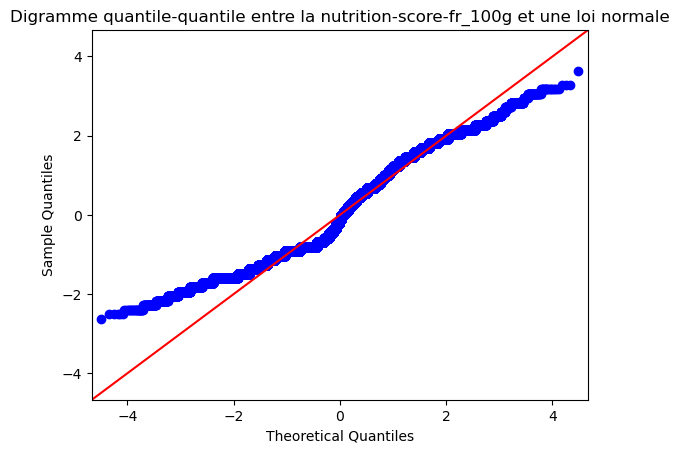

In [32]:
fig = sm.qqplot(df['nutrition-score-fr_100g'], line='45',fit=True)
plt.title("Digramme quantile-quantile entre la nutrition-score-fr_100g et une loi normale")
plt.show()

In [33]:
shapiro_wilk_test(df['nutrition-score-fr_100g'])

--------------------------------------------------
Test statistique de normalité de la variable nutrition-score-fr_100g

Indicateur statistique: 0.9539374113082886
 p valeur: 0.0

L'hypothèse H0 de normalité peut être rejetée avec un risque de 5%

--------------------------------------------------


(0.9539374113082886, 0.0)

##  Variables Qualitatives nominales

####  Barplots

In [34]:
# Fonction qui créer des barplots pour chaque catégorie

def bar_perc(data, z):
    
    total = len(data[z]) # Length of the column
    
    plt.figure(figsize = (15, 5))
    
    # plt.xticks(rotation = 45)
    
    ax = sns.countplot(data[z], palette = 'Paired')
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        
        y = p.get_y() + p.get_height()                              # Height of the plot
        
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage 
        
    plt.show()                                                      # Display the plot

### Additifs 

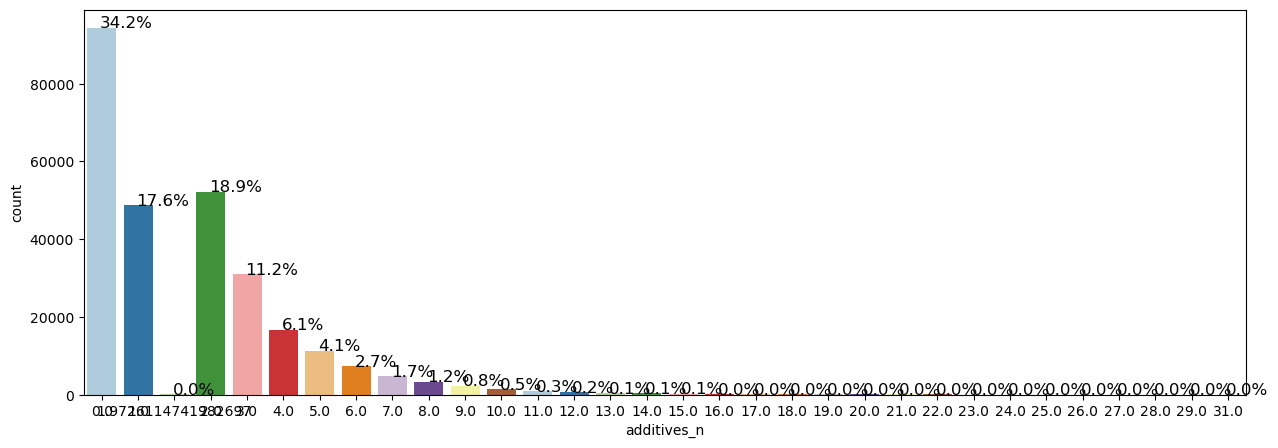

In [32]:
bar_perc(df, 'additives_n')

On constate que 34% des données ne contiennent pas d'additifs et il y a moins de 1 % des données qui contiennent plus de 10 additifs. 

### Ingrédients depuis l'huile de palme 

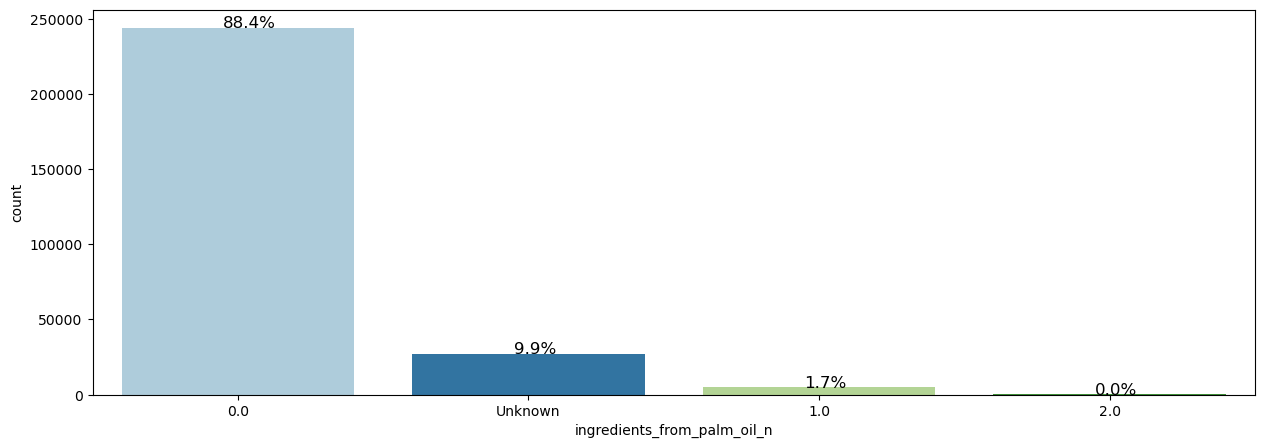

In [33]:
bar_perc(df, 'ingredients_from_palm_oil_n')

88% des données ne contiennent pas de l'huile de palme. 10% des données sont inconnues er environ 2% des données contiennent des ingrédients provenant de l'huile de palme.

### Nutrigrade

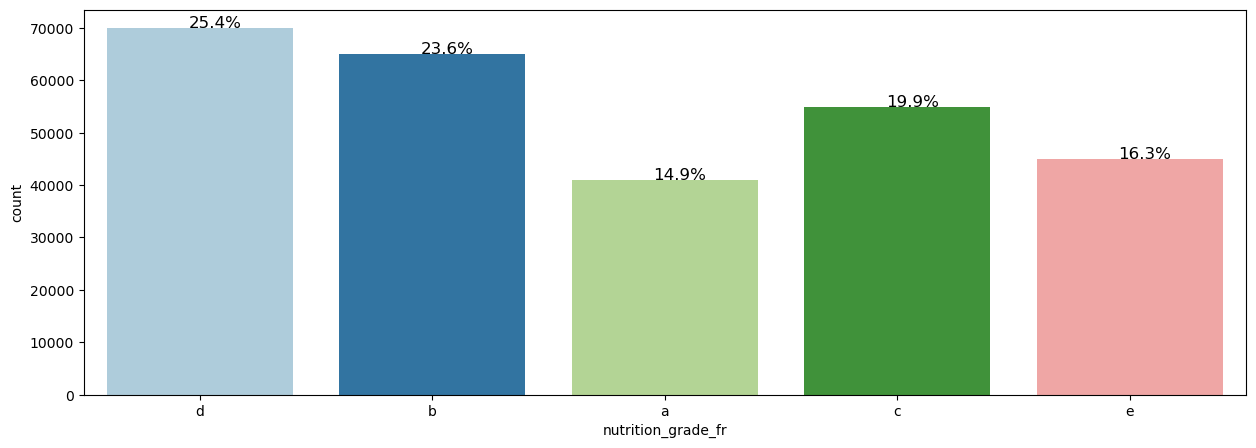

In [34]:
bar_perc(df, 'nutrition_grade_fr')

Les nutrigrades sont presque qu'équi-répartis avec les extrêmes ayant des valeurs un peu plus basses. Voici les pourcentages des données pour les différents nutrigrades : 

- 'a' : 14,9 %
- 'b' : 23.6%
- 'c' : 19.9%
- 'd' : 25.4%
- 'e' : 16.3%

# 2. Analyse Multivariée

### Analyse bivariée entre les données quantitatives : Pair Plot

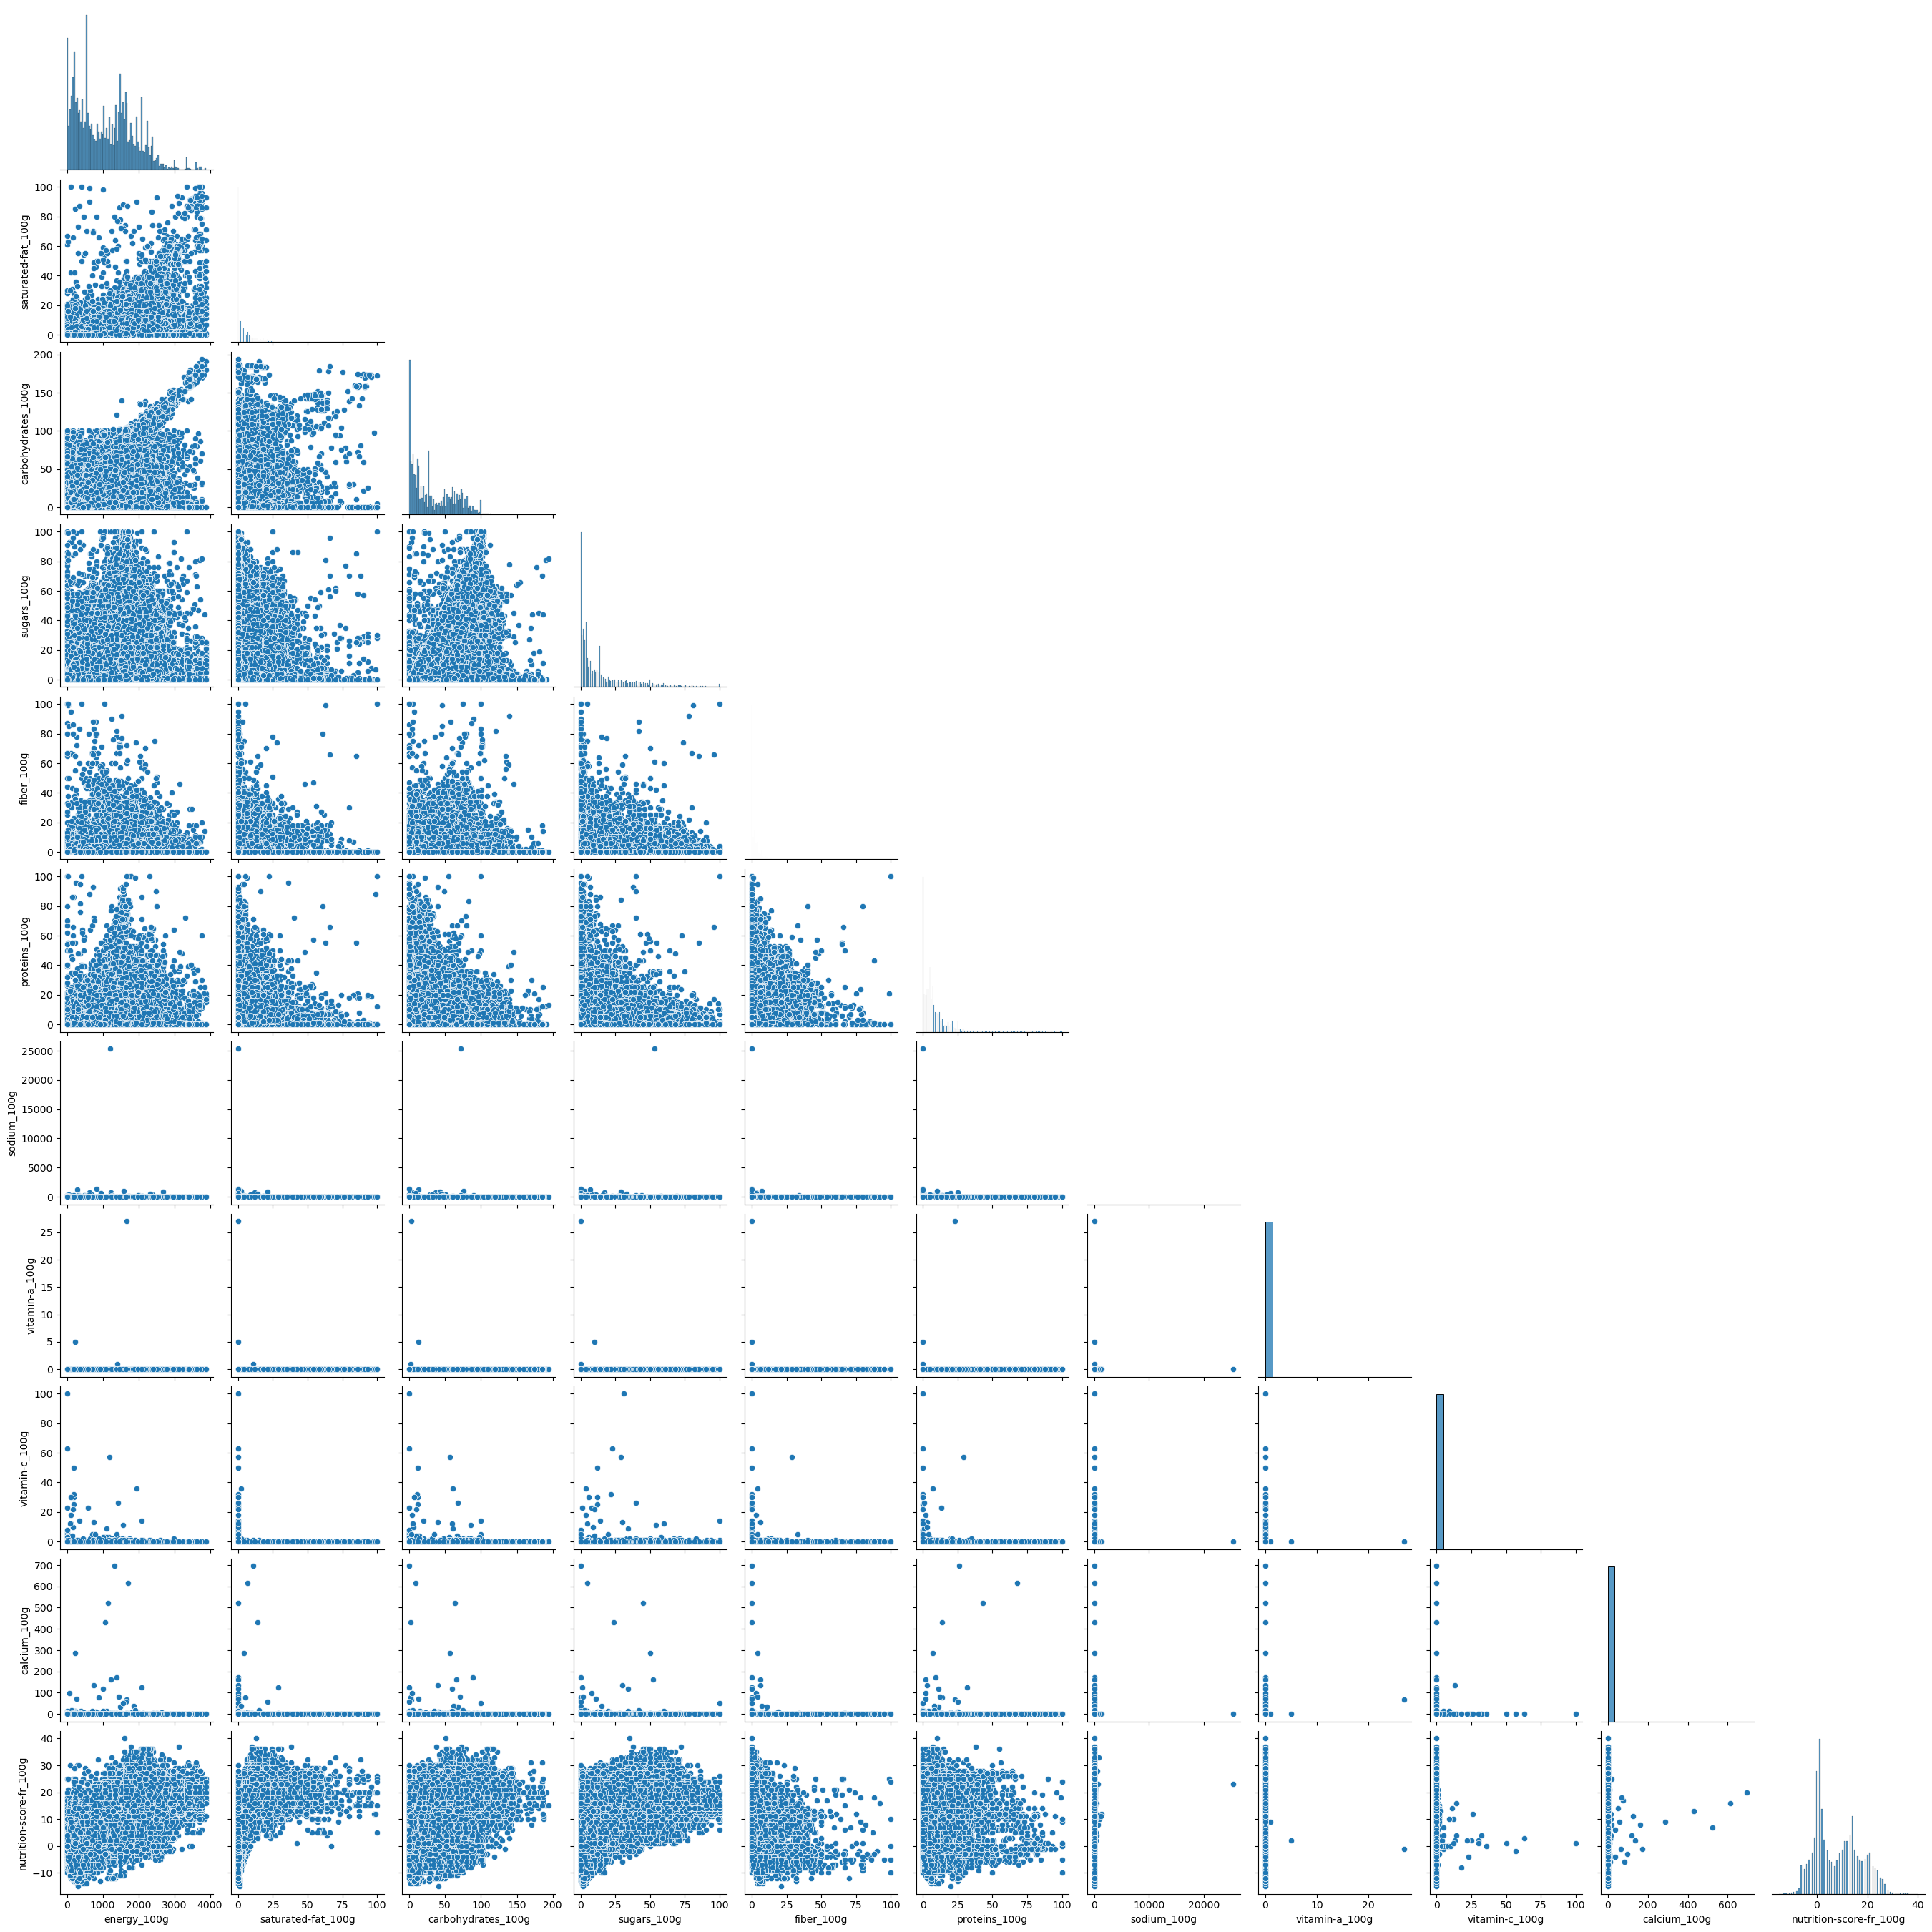

In [33]:
sns.pairplot(df[variables_numeriques], corner = True)

plt.show()

De manière générale, on remarque que certaines variables sont corrélées et d'autres sont anti-corrélées. Il y a aussi des variables qui ne sont pas corrélées avec aucune autre variable. Pour avoir un apperçu plus détaillé, nous allons utilisé un heatmap et calculer les coefficients de corrélation. 

### Heatmap avec Corrélation

<AxesSubplot:>

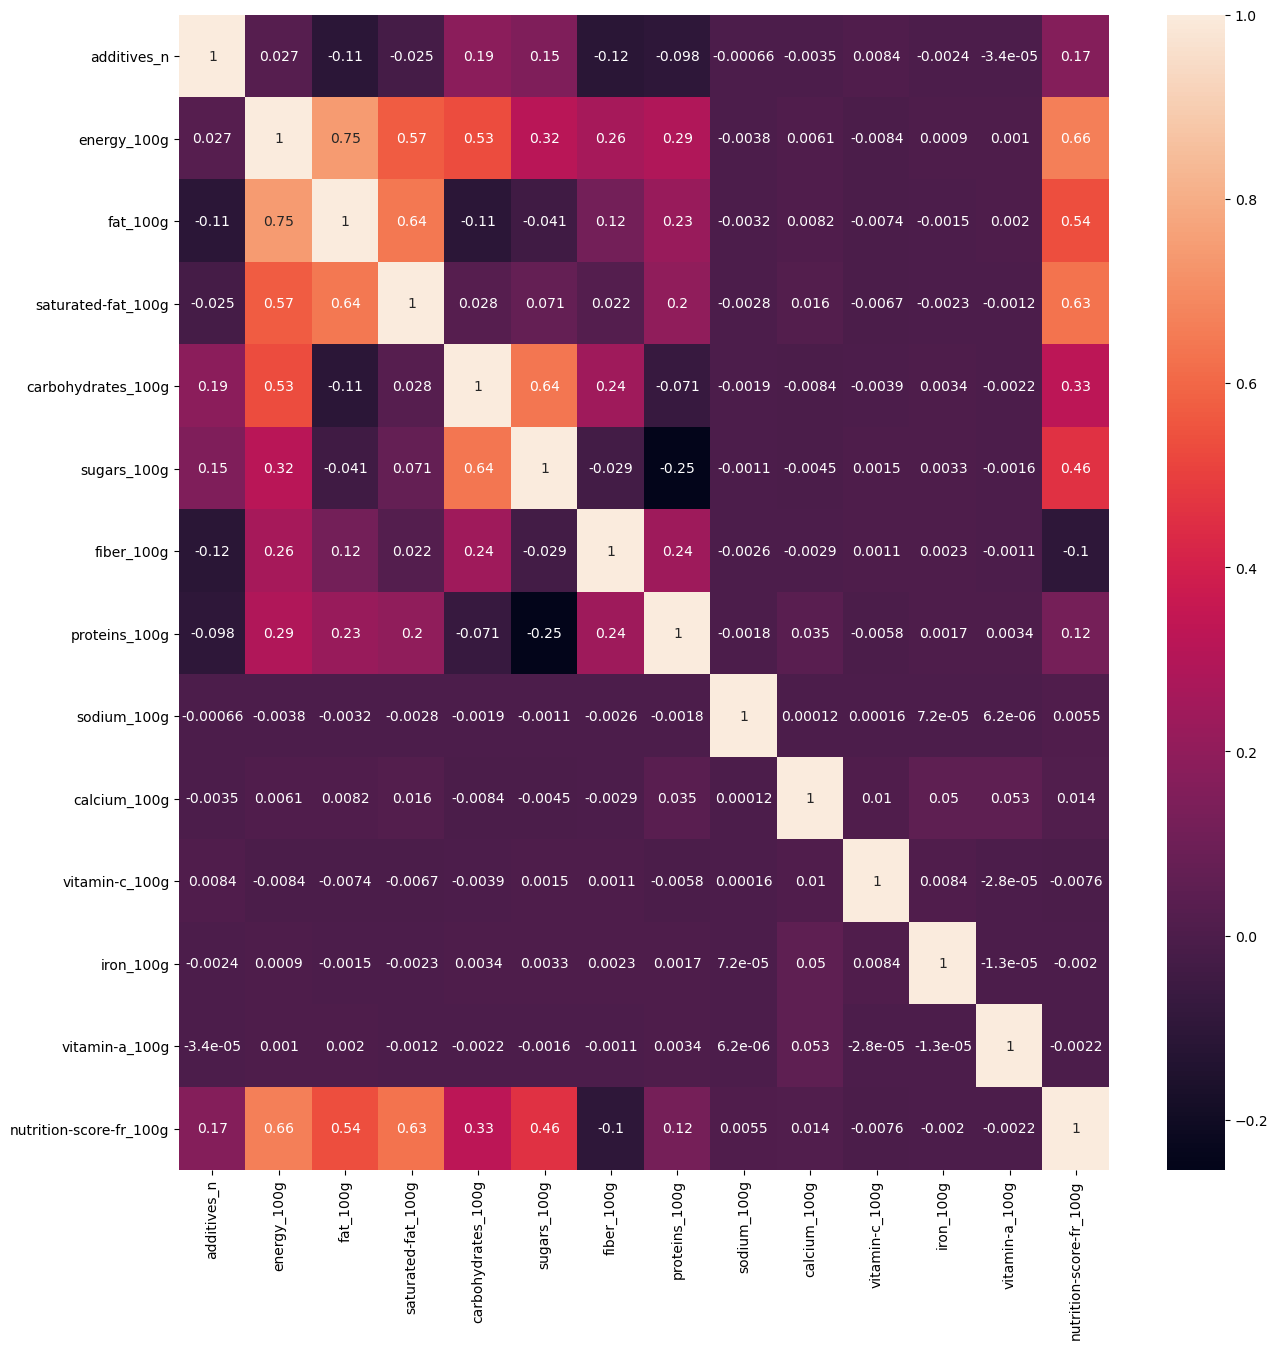

In [35]:
corr = df.corr()

#specify size of heatmap
fig, ax = plt.subplots(figsize=(15, 15))

#create seaborn heatmap
sns.heatmap(corr,annot=True)

**Observations** : 

Les variables qui sont corrélées entre-elles de manière significative sont : 
- energy_100g et nutri-score-fr_100g
- fat_100g et nutri-score-fr_100g
- saturated-fat_100g et nutri-score-fr_100g
- sugars_100g et nutri-score-fr_100g

Cette observation semble logique car plus il y a de l'énergie ou des glucides, sucres ou aliments gras, plus le nutriscore augmente. 

- sugars_100g et carbohydrates_100g
- carbohydrates_100g et energy_100g
- saturated-fat_100g et fat_100g
- saturated-fat_100g et energy_100g
- fat_100g et energy_100g

Ces observations semblent également pertinentes. 

Afin de valider une éventuelle normalité nous allons effectuer un test statistique d'indépendance de Pearson sur ces couples de variables. En effet, l'algorithme ici utilisé pour calculer la corrélation propose des relation non-linéaires de type Spearman. 

Les variables qui sont légèrement corrélées entre-elles sont : 
- vitamin-a_100g et le calcium_100g
- iron_100g et le calcium_100g
- proteins_100g et energy_100g
- fiber_100g et energy_100g
- sugars_100g et energy_100g

Ces corrélations sont également cohérentes. Afin de valider une éventuelle normalité nous allons effectuer un test statistique d'indépendance de Pearson sur ces couples de variables.

Les variables qui sont un peu anti-corrélées entre-elles sont : 
- proteins_100g et sugars_100g
- fiber_100g et nutri-score-fr_100g


In [36]:
#Fonction pour effectuer le test statistique de Pearson 
def corr_test(var1, var2, method='pearson'):
    """
    Statistical correlation test between two variables.
    
    Args:
        var1(dataframe Series): First Series to check correlation
        
        var2(dataframe Series): Second Series to check correlation
        
        method: Used method to compute correlation metric between 'pearson' and 'spearman'
        
    Returns:
        stat(float): Computed correlation metric
        
        p(float): Computed p value
    
    """
    print("-"*50)
    if method == 'pearson':
        print(f"Test statistique de corrélation linéaire de Pearson entre {var1.name} et {var2.name}\n")
        stat, p = st.pearsonr(var1,var2)
        print(f"""Coeficient de corrélation linéaire de Pearson: {stat}\n p valeur: {p}\n""")
        if p < 0.05:
            print("L'hypothèse H0 d'indépendance peut être rejetée avec un risque de 5%\n" )
        if p > 0.05:
            print("L'hypothèse H0 d'indépendance ne peut être rejetée avec un risque de 5\n")
    if method == 'spearman':
        print(f"Test statistique de corrélation de rang de Spearman entre {var1.name} et {var2.name}\n")
        stat, p = st.spearmanr(var1,var2)
        print(f"""Coeficient de corrélation de rang de Spearman: {stat}\n p valeur: {p}\n""")
        if p < 0.05:
            print("L'hypothèse H0 d'indépendance peut être rejetée avec un risque de 5%\n" )
        if p > 0.05:
            print("L'hypothèse H0 d'indépendance ne peut être rejetée avec un risque de 5\n")       
    print("-"*50)
    
    
    return stat, p

In [37]:
corr_test(df["nutrition-score-fr_100g"],df["saturated-fat_100g"])
corr_test(df["nutrition-score-fr_100g"],df["energy_100g"])
corr_test(df["nutrition-score-fr_100g"],df["fat_100g"])
corr_test(df["nutrition-score-fr_100g"],df["sugars_100g"])

--------------------------------------------------
Test statistique de corrélation linéaire de Pearson entre nutrition-score-fr_100g et saturated-fat_100g

Coeficient de corrélation linéaire de Pearson: 0.6309376176625612
 p valeur: 0.0

L'hypothèse H0 d'indépendance peut être rejetée avec un risque de 5%

--------------------------------------------------
--------------------------------------------------
Test statistique de corrélation linéaire de Pearson entre nutrition-score-fr_100g et energy_100g

Coeficient de corrélation linéaire de Pearson: 0.664119990900826
 p valeur: 0.0

L'hypothèse H0 d'indépendance peut être rejetée avec un risque de 5%

--------------------------------------------------
--------------------------------------------------
Test statistique de corrélation linéaire de Pearson entre nutrition-score-fr_100g et fat_100g

Coeficient de corrélation linéaire de Pearson: 0.536957880284628
 p valeur: 0.0

L'hypothèse H0 d'indépendance peut être rejetée avec un risque 

(0.45792179250939435, 0.0)

Les variables sont liées entre-elles. 

In [38]:
corr_test(df["fat_100g"],df["energy_100g"])
corr_test(df["fat_100g"],df["saturated-fat_100g"])

--------------------------------------------------
Test statistique de corrélation linéaire de Pearson entre fat_100g et energy_100g

Coeficient de corrélation linéaire de Pearson: 0.7450668631351071
 p valeur: 0.0

L'hypothèse H0 d'indépendance peut être rejetée avec un risque de 5%

--------------------------------------------------
--------------------------------------------------
Test statistique de corrélation linéaire de Pearson entre fat_100g et saturated-fat_100g

Coeficient de corrélation linéaire de Pearson: 0.6437252384270982
 p valeur: 0.0

L'hypothèse H0 d'indépendance peut être rejetée avec un risque de 5%

--------------------------------------------------


(0.6437252384270982, 0.0)

Les variables sont liées entre-elles.

In [39]:
corr_test(df["carbohydrates_100g"],df["sugars_100g"])
corr_test(df["carbohydrates_100g"],df["energy_100g"])

--------------------------------------------------
Test statistique de corrélation linéaire de Pearson entre carbohydrates_100g et sugars_100g

Coeficient de corrélation linéaire de Pearson: 0.6400598578097279
 p valeur: 0.0

L'hypothèse H0 d'indépendance peut être rejetée avec un risque de 5%

--------------------------------------------------
--------------------------------------------------
Test statistique de corrélation linéaire de Pearson entre carbohydrates_100g et energy_100g

Coeficient de corrélation linéaire de Pearson: 0.5298751101423242
 p valeur: 0.0

L'hypothèse H0 d'indépendance peut être rejetée avec un risque de 5%

--------------------------------------------------


(0.5298751101423242, 0.0)

Le test de pearson sur ces couples de variables confirme qu'elles ne sont pas indépendantes.

### Analyse bivariée sur des couples composés d'une variable quantitative continue et une variable qualitative

#### Couple additives_n et nutrigrade

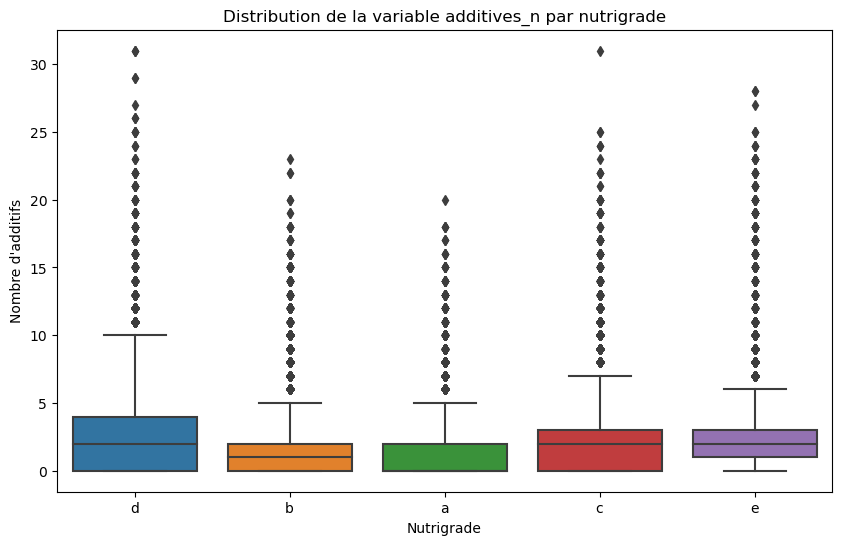

In [40]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax = sns.boxplot(data=data, x='nutrition_grade_fr', y='additives_n' )
ax.set_title("Distribution de la variable additives_n par nutrigrade")
ax.set_xlabel("Nutrigrade")
ax.set_ylabel("Nombre d'additifs")

plt.show()

La distribution semble uniforme. Le nutrigrade n'a pas trop d'impact sur le nombre d'additifs. 
Effectuons une analyse de la variance pour affiner l'analyse.

In [41]:
from scipy.stats import yeojohnson
import statsmodels.formula.api as smf

df_copy=df.copy()
df_copy["normal_additives_n"], additives_lambda =  yeojohnson(df_copy["additives_n"])   
model = smf.ols('normal_additives_n ~ nutrition_grade_fr ', data=df_copy).fit()
table = sm.stats.anova_lm(model)
table

,df,sum_sq,mean_sq,F,PR(>F)
nutrition_grade_fr,4.0,5345.282181,1336.320545,4199.476245,0.0
Residual,276023.0,87833.621230,0.318211,NaN,NaN


Avec un p valeur à 0.0 nous pouvons rejeter l'hypothèse d'indépendance de ces deux variables. Ils sont probablement liés. 

#### Couple nutriscore et nutrigrade

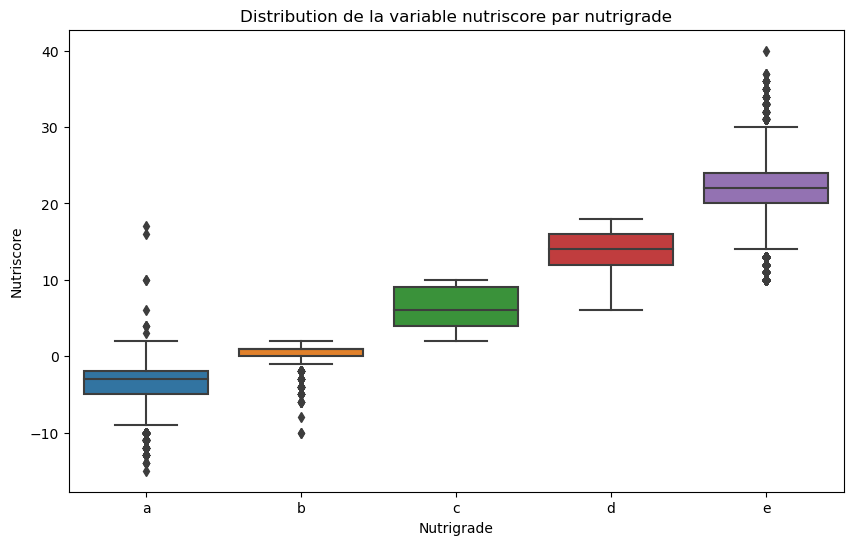

In [42]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax = sns.boxplot(data=data, x='nutrition_grade_fr', y='nutrition-score-fr_100g',
                 order=["a", "b", "c","d","e"] )
ax.set_title("Distribution de la variable nutriscore par nutrigrade")
ax.set_xlabel("Nutrigrade")
ax.set_ylabel("Nutriscore")

plt.show()

On observe bien une relation linéaire entre le nutriscore et le nutrigrade que l'on pourra par la suite confirmer avec l'analyse de variance.

In [43]:
df_copy = df.copy()
df_copy.rename({"nutrition-score-fr_100g": "nutrition_score_fr_100g"}, axis=1, inplace=True) 
df_copy["normal_nutrition_score_fr_100g"], additives_lambda =  yeojohnson(df_copy["nutrition_score_fr_100g"])   
model = smf.ols('normal_nutrition_score_fr_100g ~ nutrition_grade_fr', data=df_copy).fit()
table = sm.stats.anova_lm(model)
table

,df,sum_sq,mean_sq,F,PR(>F)
nutrition_grade_fr,4.0,9.725660e+06,2.431415e+06,863791.779198,0.0
Residual,276023.0,7.769540e+05,2.814816e+00,NaN,NaN


Avec un p valeur à 0.0 nous pouvons rejeter l'hypothèse d'indépendance de ces deux variables. Ils sont bien liés. 

### Analyse Multivariée

#### Relation entre glucides, énergie et nutrigrade

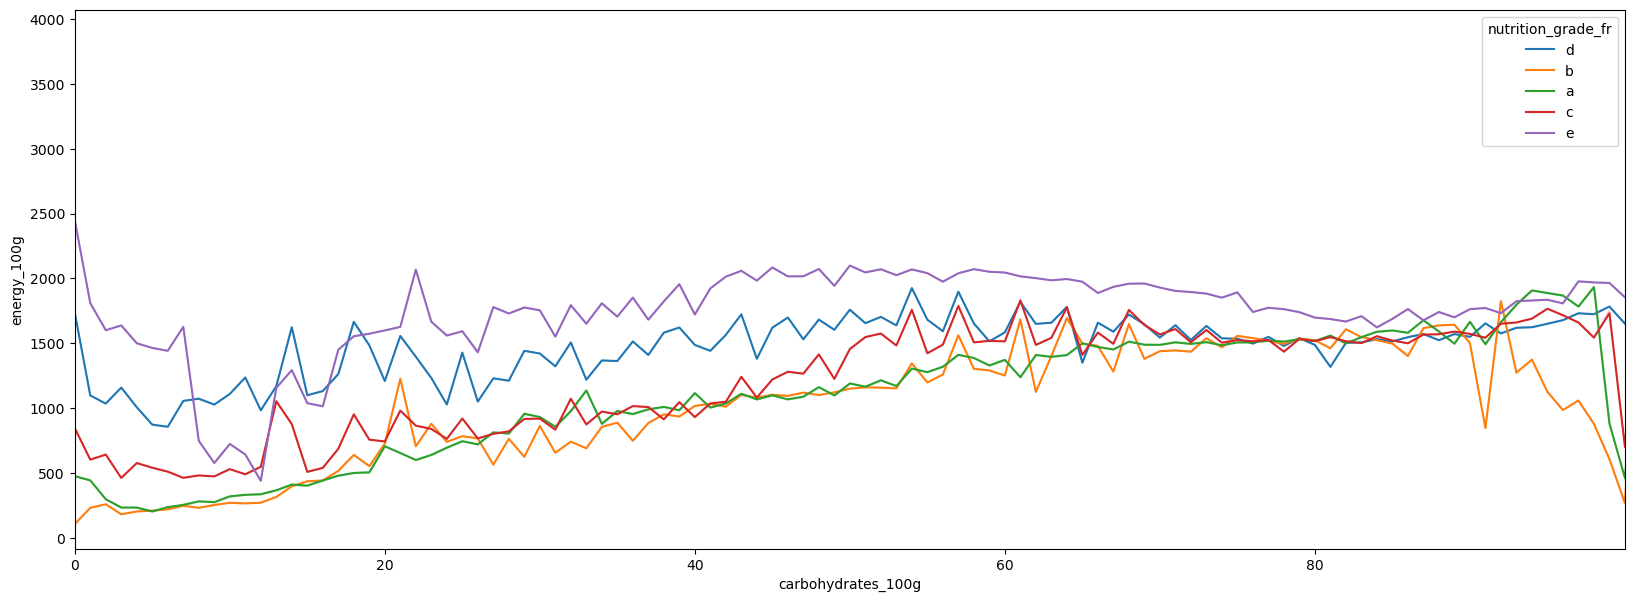

In [45]:
plt.figure(figsize = (20, 7))

sns.lineplot(y = "energy_100g", x = "carbohydrates_100g", ci = 0, data = df, hue = 'nutrition_grade_fr')

plt.ylabel('energy_100g')

plt.xlabel('carbohydrates_100g')
plt.xlim(0, 99.99)

plt.show()

On constate que l'énergie augmente quand la quantité de glucides consommée augmente, quelque soit le nutrigrade de l'aliment. En petite quantité, en dessous de 100g, on peut distinguer que plus le nutrigrade augmente, plus on reçoit de l'énergie pour la même quantité d'aliments consommés. 

### ACP

Nous réalisons l'analyse multivarié grâce à une ACP sur les variables quantitatives. 

In [47]:
#Importation des libraires et fonctions

from sklearn import decomposition
from sklearn import preprocessing 

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(14,12))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

In [48]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

In [49]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

In [50]:
X = df.loc[:, variables_numeriques].values
features = df.loc[:, variables_numeriques].columns
n_comp = 11

In [51]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [52]:
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=11)

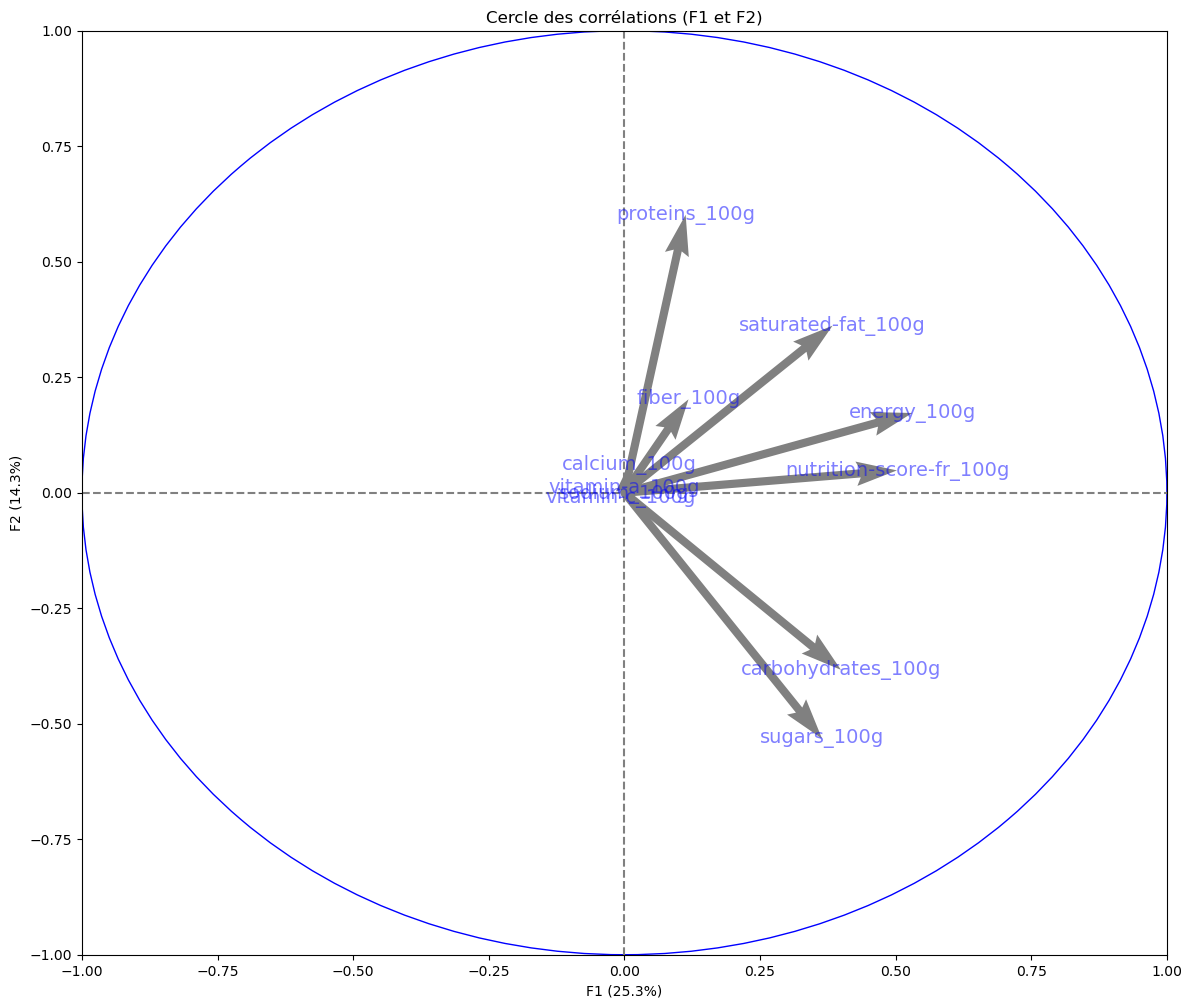

In [51]:
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

Les variables energy_100g et nutriscore sont les deux variables les plus Les variables corrélées sont energy_100g et nutri-score_100g, carbohydrates_100g et sugars_100g. La composante 1 est principalement expliquée par energy_100g et nutri-score_100g. La seconde composante est principalement expliquée par les protéines et les fibres mais plus par les protéines. 

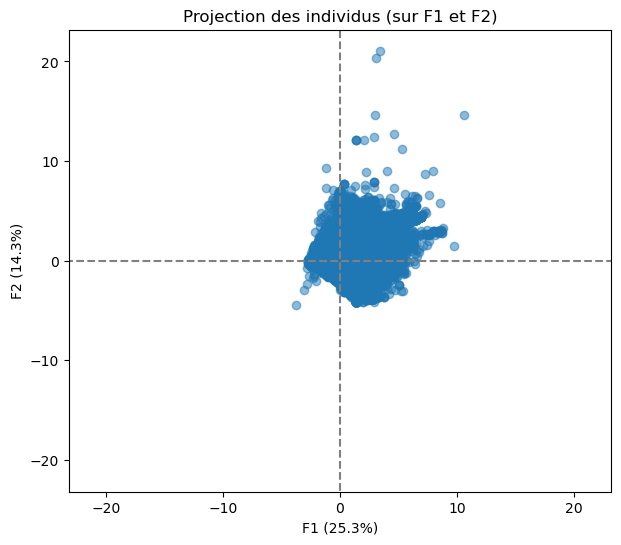

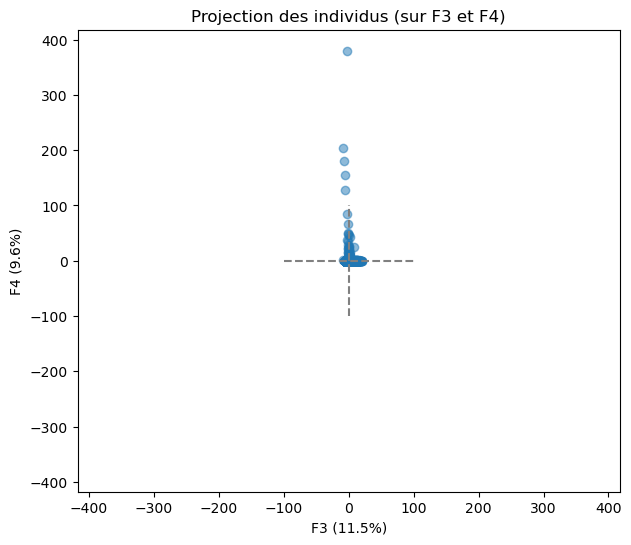

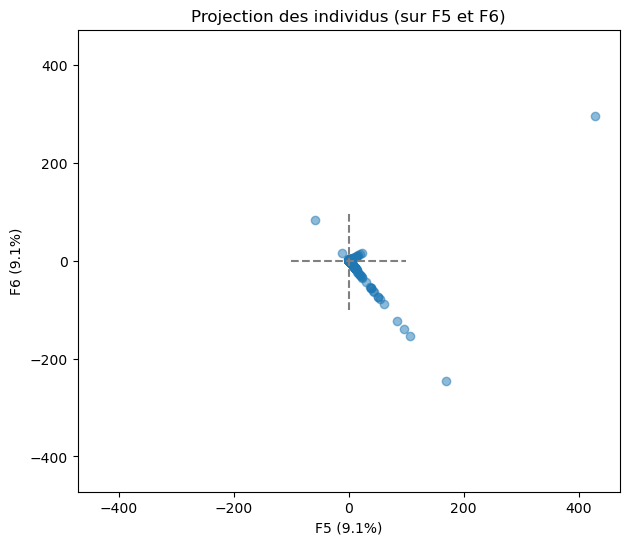

In [52]:
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], alpha = 0.5)

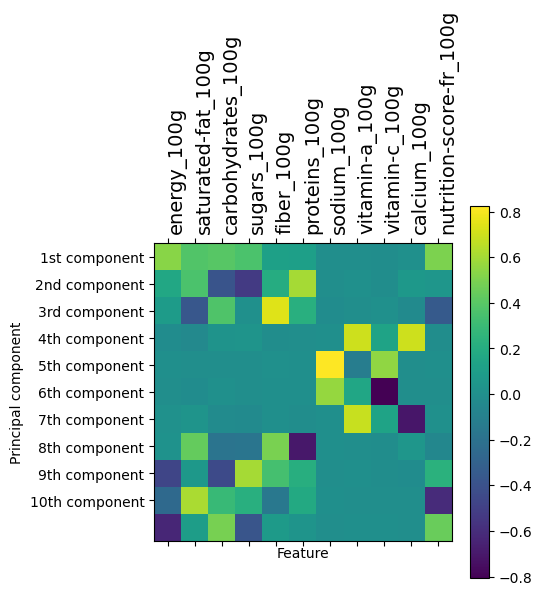

In [53]:
features=variables_numeriques
plt.matshow(pca.components_,cmap='viridis');
plt.yticks([0,1,2,3,4,5,6,7,8,9], ['1st component', '2nd component','3rd component','4th component', '5th component','6th component','7th component','8th component','9th component','10th component']);
plt.colorbar();
plt.xticks(range(len(features)),features, rotation = 90, fontsize=14, ha = 'left');
plt.xlabel('Feature');
plt.ylabel('Principal component');

On peut observer l'influence des différents nutriments sur les composantes principales (impact positif ou négatif). 

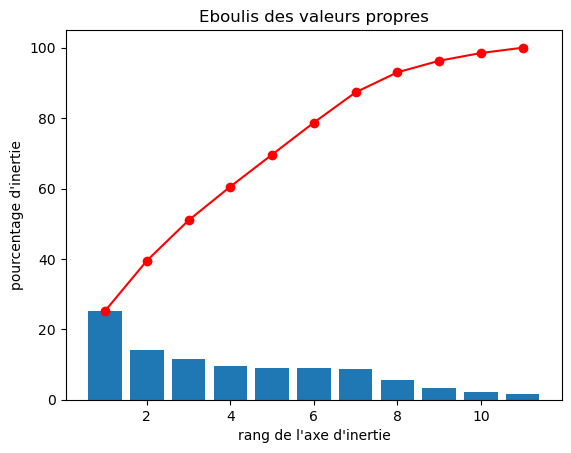

In [54]:
display_scree_plot(pca)

Il apparaît qu'il est nécessaire d'avoir recours à 7 composantes principales,  afin de capter au moins 80% de l'inertie. 

In [55]:
# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

# Finding the least number of components that can explain more than 70% variance
sum = 0

for ix, i in enumerate(exp_var):

    sum = sum + i
    
    if(sum>0.80):
        
        print("Number of PCs that explain at least 80% variance:", ix + 1)
        break

Number of PCs that explain at least 80% variance: 7


In [56]:
df2 = df.copy()
df2= df2.set_index('code')
df2= df2.select_dtypes(exclude=['object'])

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


# Importing PCA and t-SNE
from sklearn.decomposition import PCA

data_scaled = pd.DataFrame(scaler.fit_transform(df2), columns = df2.columns)
# Defining the number of principal components to generate
n = data_scaled.shape[1]

# Finding principal components for the data
pca = PCA(n_components = n, random_state = 1)

data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))


pc_comps = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7']

data_pca = pd.DataFrame(np.round(pca.components_[:7,:],2), index = pc_comps, columns = data_scaled.columns)

data_pca.T

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
additives_n,0.04,-0.31,-0.22,0.05,-0.01,-0.01,0.06
energy_100g,0.52,0.02,0.15,-0.01,-0.00,0.00,0.01
fat_100g,0.41,0.35,-0.14,-0.03,-0.01,-0.00,0.00
saturated-fat_100g,0.42,0.23,-0.24,-0.01,-0.01,-0.00,-0.00
carbohydrates_100g,0.26,-0.51,0.35,0.01,0.01,0.00,-0.00
sugars_100g,0.24,-0.55,-0.00,0.01,0.01,0.00,-0.02
fiber_100g,0.11,0.09,0.74,-0.02,-0.01,0.01,0.02
proteins_100g,0.15,0.38,0.33,0.04,0.00,0.01,0.02
sodium_100g,-0.00,-0.00,-0.01,0.00,-0.02,1.00,0.01
calcium_100g,0.01,0.03,0.00,0.70,0.06,0.00,-0.05


In [57]:
def color_high(val):
    
    if val < -0.25:                     # You can decide any value as per your understanding
        return 'background: pink'
    
    elif val > 0.25:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
additives_n,0.040000,-0.310000,-0.220000,0.050000,-0.010000,-0.010000,0.060000
energy_100g,0.520000,0.020000,0.150000,-0.010000,-0.000000,0.000000,0.010000
fat_100g,0.410000,0.350000,-0.140000,-0.030000,-0.010000,-0.000000,0.000000
saturated-fat_100g,0.420000,0.230000,-0.240000,-0.010000,-0.010000,-0.000000,-0.000000
carbohydrates_100g,0.260000,-0.510000,0.350000,0.010000,0.010000,0.000000,-0.000000
sugars_100g,0.240000,-0.550000,-0.000000,0.010000,0.010000,0.000000,-0.020000
fiber_100g,0.110000,0.090000,0.740000,-0.020000,-0.010000,0.010000,0.020000
proteins_100g,0.150000,0.380000,0.330000,0.040000,0.000000,0.010000,0.020000
sodium_100g,-0.000000,-0.000000,-0.010000,0.000000,-0.020000,1.000000,0.010000
calcium_100g,0.010000,0.030000,0.000000,0.700000,0.060000,0.000000,-0.050000


### Interprétations des trois premières composantes principales : 

- PC1 : energy_100g, fat_100g saturated-fat_100g, carbohydrates_100g et nutrition-score-fr_100g influencent principalement cette composante. On peut relier cela aux points N utilisés calculés pour le nutri score. 

- PC2 : On a les additifs, les sucres et les glucides qui influencent négativement cette composante. Les acides gras et le protéine influencent positivement cette composante. 

- PC 3: Les fibres et les protéines et le nutri score sont reliés dans cette composante. On voit que les fibres et les protéines influencent positivement la composante alors que le nutri-score est anti-corrélé avec cette composante. Cette composante peut être reliée aux point P. 


# Conclusion

MyHealth peut se baser sur le calcul du nutri-score et du nutri-grade à partir des axes de composantes principales. L'application analysera donc les ingrédients et leurs contribution positive ou négative à l'axe ou aux axes principaux.

Ensuite, un algorithme de clusturing comme le KNN pourra être utilisé pour suggérer des ingrédients en alternatives ( en calories équivalents) au cas où l'alimentation peut être améliorée. 

Il sera possible également d'y intégrer d'autres features comme le sommeil ou le sport dans l'application pour compléter. 

Myhealth sera une application qui apportera des analyses, des conseils et des suggestions pour améliorer son quotidien au niveau santé. Elle pourra effectuer une analyse des nutriments à partir des données du produits et calculer un équivalent de nutriscore et de nutrigrade. Elle proposera des améliorations et des conseils par la suite. 